## Problem Statement

### Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost.
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models.
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing necessary libraries

In [2]:
# Installing the libraries with the specified version.
#!pip install pandas==1.5.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 imbalanced-learn==0.10.1 xgboost==2.0.3 threadpoolctl==3.3.0 -q --user

**Note:** After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.

In [3]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores and split data
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# Libraries to get different metric scores
from sklearn import metrics

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier

# To use statistical functions
import scipy.stats as stats

#To impute missing data
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To suppress the warning
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#read the training data
generator= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ModelTuning/Project6/Train.csv")
#read the test data
generator_test= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ModelTuning/Project6/Test.csv")


## Data Overview

### Displaying the first few rows of the dataset

In [6]:
generator.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.465,-4.679,3.102,0.506,-0.221,-2.033,-2.911,0.051,-1.522,3.762,-5.715,0.736,0.981,1.418,-3.376,-3.047,0.306,2.914,2.270,4.395,-2.388,0.646,-1.191,3.133,0.665,-2.511,-0.037,0.726,-3.982,-1.073,1.667,3.060,-1.690,2.846,2.235,6.667,0.444,-2.369,2.951,-3.480,0
1,3.366,3.653,0.910,-1.368,0.332,2.359,0.733,-4.332,0.566,-0.101,1.914,-0.951,-1.255,-2.707,0.193,-4.769,-2.205,0.908,0.757,-5.834,-3.065,1.597,-1.757,1.766,-0.267,3.625,1.500,-0.586,0.783,-0.201,0.025,-1.795,3.033,-2.468,1.895,-2.298,-1.731,5.909,-0.386,0.616,0
2,-3.832,-5.824,0.634,-2.419,-1.774,1.017,-2.099,-3.173,-2.082,5.393,-0.771,1.107,1.144,0.943,-3.164,-4.248,-4.039,3.689,3.311,1.059,-2.143,1.650,-1.661,1.680,-0.451,-4.551,3.739,1.134,-2.034,0.841,-1.600,-0.257,0.804,4.086,2.292,5.361,0.352,2.940,3.839,-4.309,0
3,1.618,1.888,7.046,-1.147,0.083,-1.530,0.207,-2.494,0.345,2.119,-3.053,0.460,2.705,-0.636,-0.454,-3.174,-3.404,-1.282,1.582,-1.952,-3.517,-1.206,-5.628,-1.818,2.124,5.295,4.748,-2.309,-3.963,-6.029,4.949,-3.584,-2.577,1.364,0.623,5.550,-1.527,0.139,3.101,-1.277,0
4,-0.111,3.872,-3.758,-2.983,3.793,0.545,0.205,4.849,-1.855,-6.220,1.998,4.724,0.709,-1.989,-2.633,4.184,2.245,3.734,-6.313,-5.380,-0.887,2.062,9.446,4.490,-3.945,4.582,-8.780,-3.383,5.107,6.788,2.044,8.266,6.629,-10.069,1.223,-3.230,1.687,-2.164,-3.645,6.510,0


In [7]:
generator_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-0.613,-3.820,2.202,1.300,-1.185,-4.496,-1.836,4.723,1.206,-0.342,-5.123,1.017,4.819,3.269,-2.984,1.387,2.032,-0.512,-1.023,7.339,-2.242,0.155,2.054,-2.772,1.851,-1.789,-0.277,-1.255,-3.833,-1.505,1.587,2.291,-5.411,0.870,0.574,4.157,1.428,-10.511,0.455,-1.448,0
1,0.390,-0.512,0.527,-2.577,-1.017,2.235,-0.441,-4.406,-0.333,1.967,1.797,0.410,0.638,-1.390,-1.883,-5.018,-3.827,2.418,1.762,-3.242,-3.193,1.857,-1.708,0.633,-0.588,0.084,3.014,-0.182,0.224,0.865,-1.782,-2.475,2.494,0.315,2.059,0.684,-0.485,5.128,1.721,-1.488,0
2,-0.875,-0.641,4.084,-1.590,0.526,-1.958,-0.695,1.347,-1.732,0.466,-4.928,3.565,-0.449,-0.656,-0.167,-1.630,2.292,2.396,0.601,1.794,-2.120,0.482,-0.841,1.790,1.874,0.364,-0.169,-0.484,-2.119,-2.157,2.907,-1.319,-2.997,0.460,0.620,5.632,1.324,-1.752,1.808,1.676,0
3,0.238,1.459,4.015,2.534,1.197,-3.117,-0.924,0.269,1.322,0.702,-5.578,-0.851,2.591,0.767,-2.391,-2.342,0.572,-0.934,0.509,1.211,-3.260,0.105,-0.659,1.498,1.100,4.143,-0.248,-1.137,-5.356,-4.546,3.809,3.518,-3.074,-0.284,0.955,3.029,-1.367,-3.412,0.906,-2.451,0
4,5.828,2.768,-1.235,2.809,-1.642,-1.407,0.569,0.965,1.918,-2.775,-0.530,1.375,-0.651,-1.679,-0.379,-4.443,3.894,-0.608,2.945,0.367,-5.789,4.598,4.450,3.225,0.397,0.248,-2.362,1.079,-0.473,2.243,-3.591,1.774,-1.502,-2.227,4.777,-6.560,-0.806,-0.276,-3.858,-0.538,0


### Checking the shape of the dataset

In [8]:
# Checking the shape of the training dataset
generator.shape

(20000, 41)

*  There are 20000 records and 41 columns in the training data set

In [9]:
# Checking the shape of the test dataset
generator_test.shape

(5000, 41)

*  There are 5000 records and 41 columns in the test data set

In [10]:
# let's create a copy of the training data
data = generator.copy()

In [11]:
# let's create a copy of the test data
data_test = generator_test.copy()

### Checking the data types of the columns for the dataset

In [12]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

* There are a total  of 40 columns and 20000 observations in the dataset
*  All the variables except the target variable is of type float
*'Target' variable is of type int
* We can see that columns V1 and V2 have less than 20000 non-null values i.e. these columns have missing values. We'll explore this further.

### Statistical summary of the dataset

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,19982.000,-0.272,3.442,-11.876,-2.737,-0.748,1.840,15.493
V2,19982.000,0.440,3.151,-12.320,-1.641,0.472,2.544,13.089
V3,20000.000,2.485,3.389,-10.708,0.207,2.256,4.566,17.091
V4,20000.000,-0.083,3.432,-15.082,-2.348,-0.135,2.131,13.236
V5,20000.000,-0.054,2.105,-8.603,-1.536,-0.102,1.340,8.134
V6,20000.000,-0.995,2.041,-10.227,-2.347,-1.001,0.380,6.976
V7,20000.000,-0.879,1.762,-7.950,-2.031,-0.917,0.224,8.006
V8,20000.000,-0.548,3.296,-15.658,-2.643,-0.389,1.723,11.679
V9,20000.000,-0.017,2.161,-8.596,-1.495,-0.068,1.409,8.138
V10,20000.000,-0.013,2.193,-9.854,-1.411,0.101,1.477,8.108


### Checking for duplicate values

In [14]:
# let's check for duplicate values in the data
data.duplicated().sum()

np.int64(0)

*  There are no duplicated values

### Checking for missing values

In [15]:
# let's check for any missing values in the training dataset
data.isnull().sum()

,0
V1,18
V2,18
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


*  18 missing values in both V1 and V2

In [16]:
# let's check for any missing values in the test dataset
data_test.isnull().sum()

,0
V1,5
V2,6
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


*  In the test data set 5 values are missing in V1 and 6 values are missing in V2

## Exploratory Data Analysis (EDA)

### Plotting histograms and boxplots for all the variables

In [17]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Univariate analysis

#### Plotting all the features at one go

In [18]:
data.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40',
       'Target'],
      dtype='object')

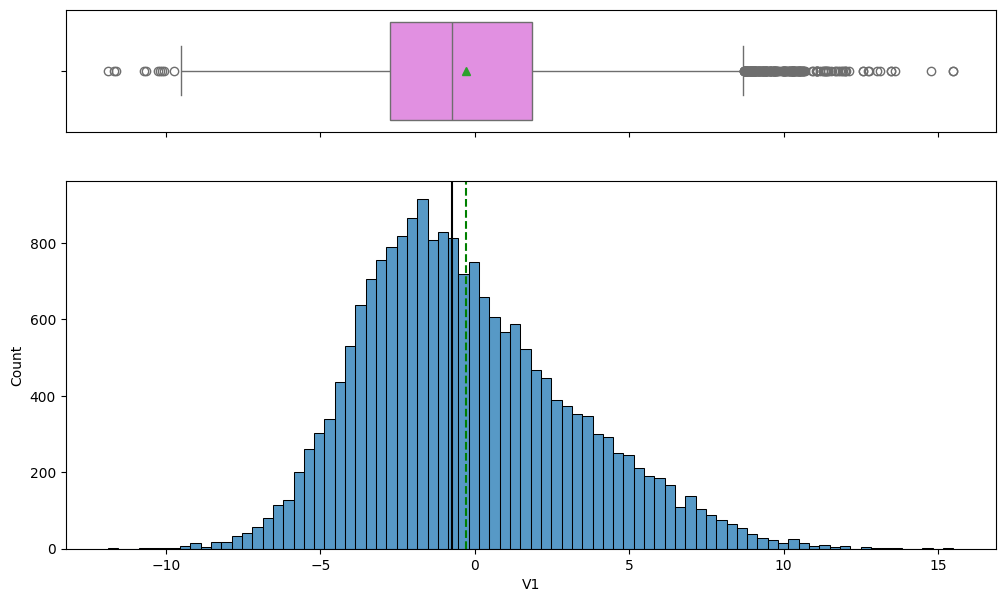

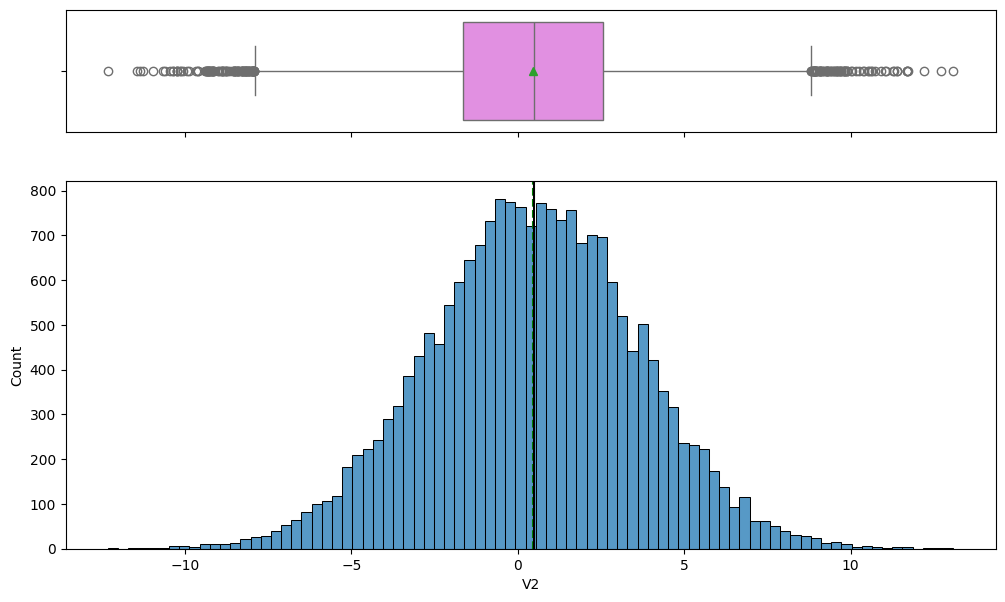

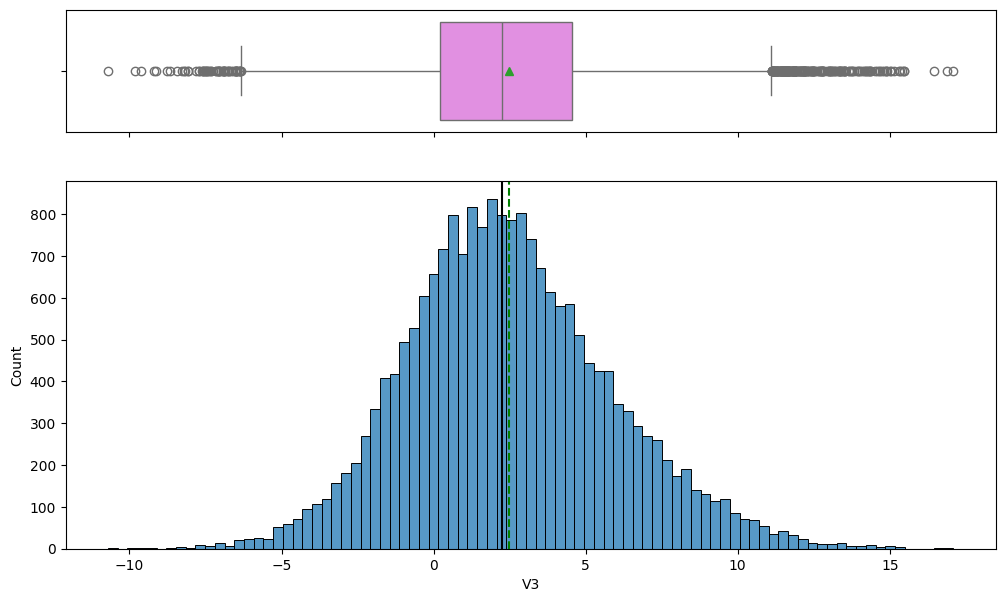

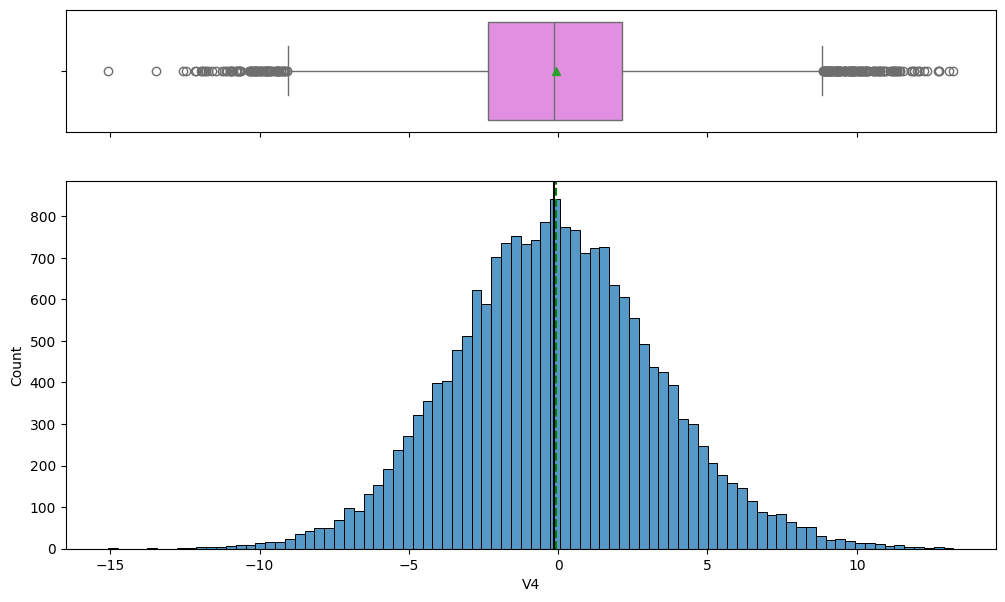

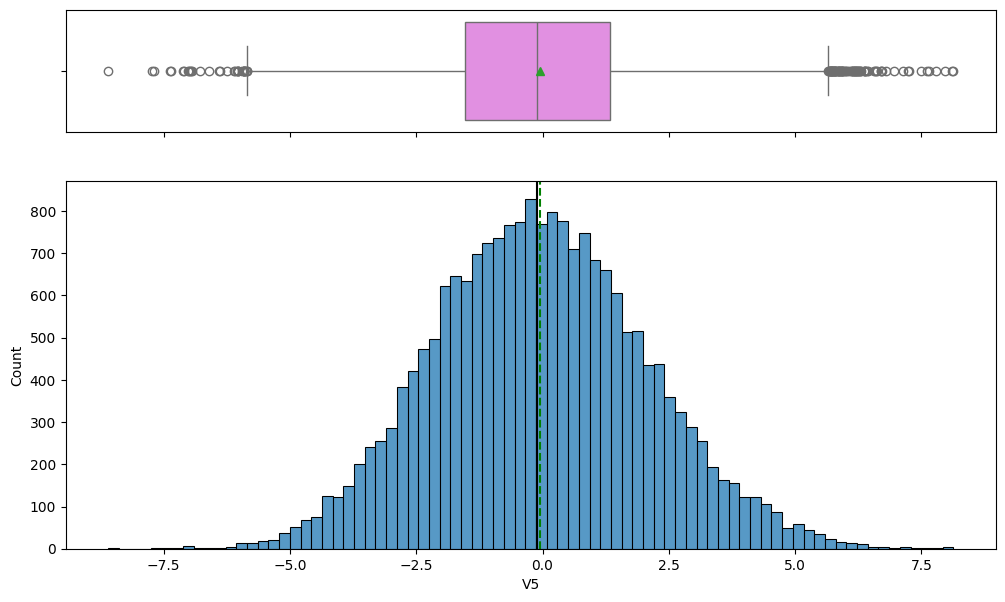

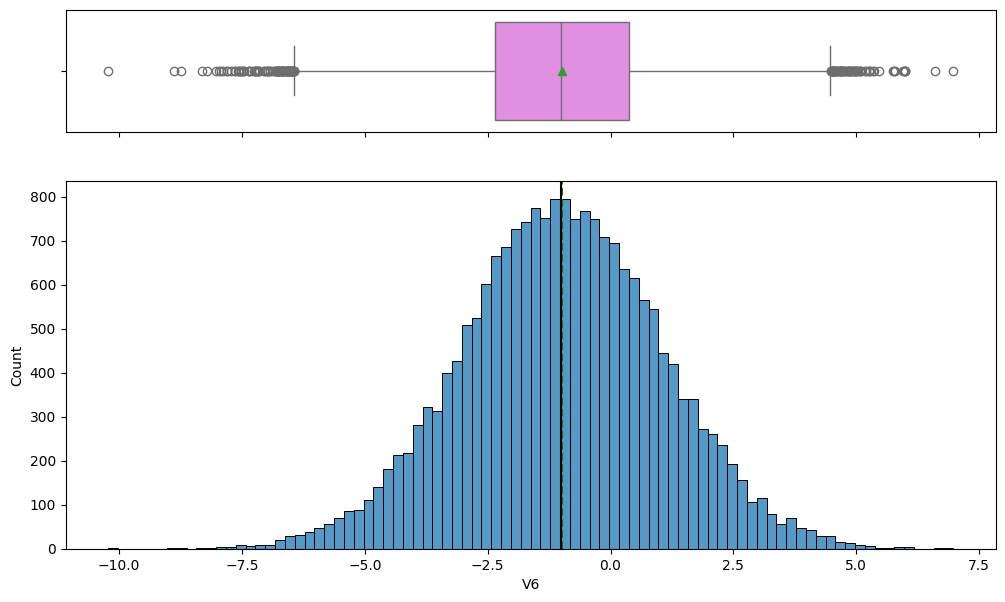

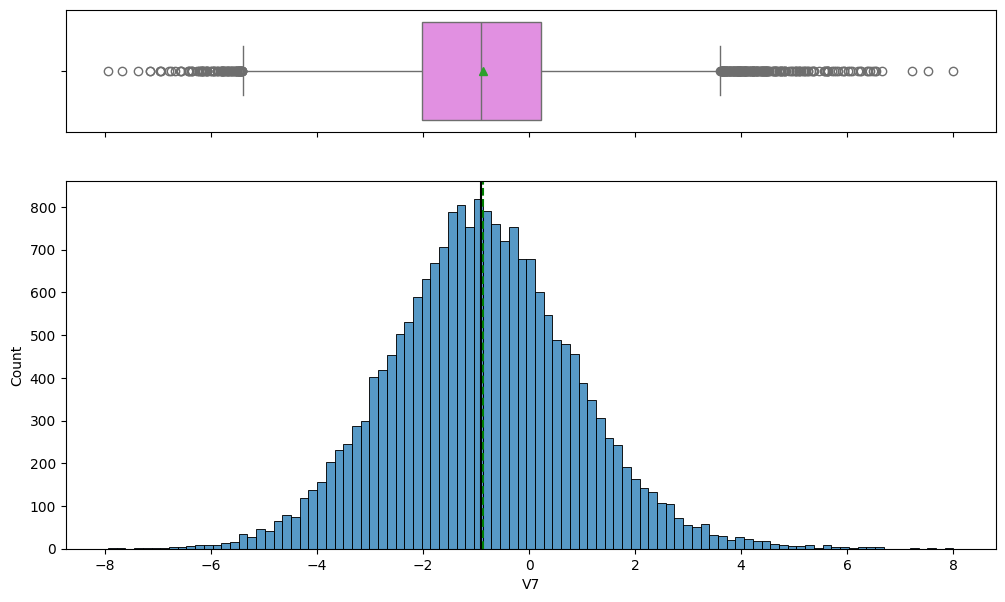

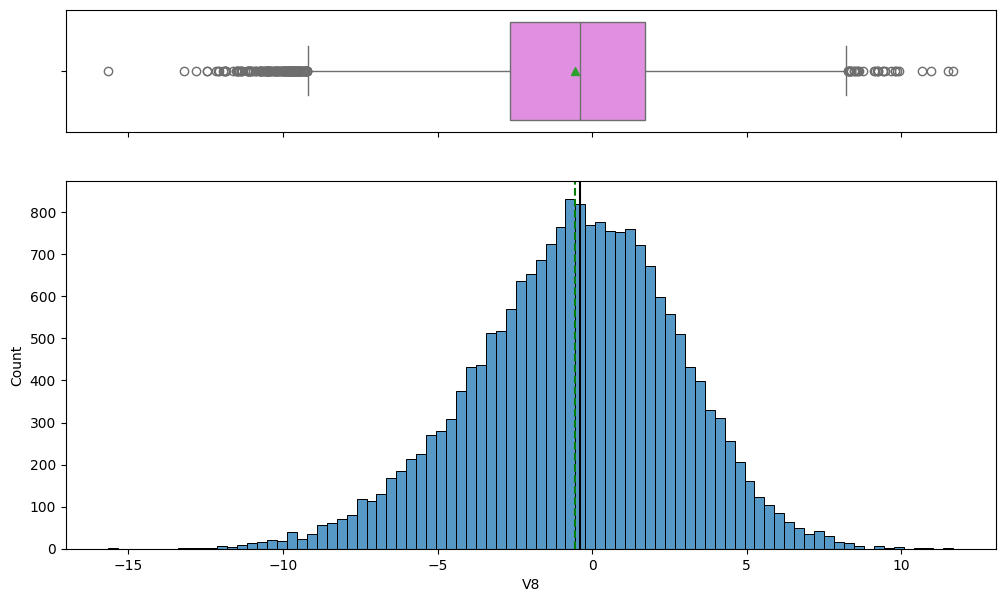

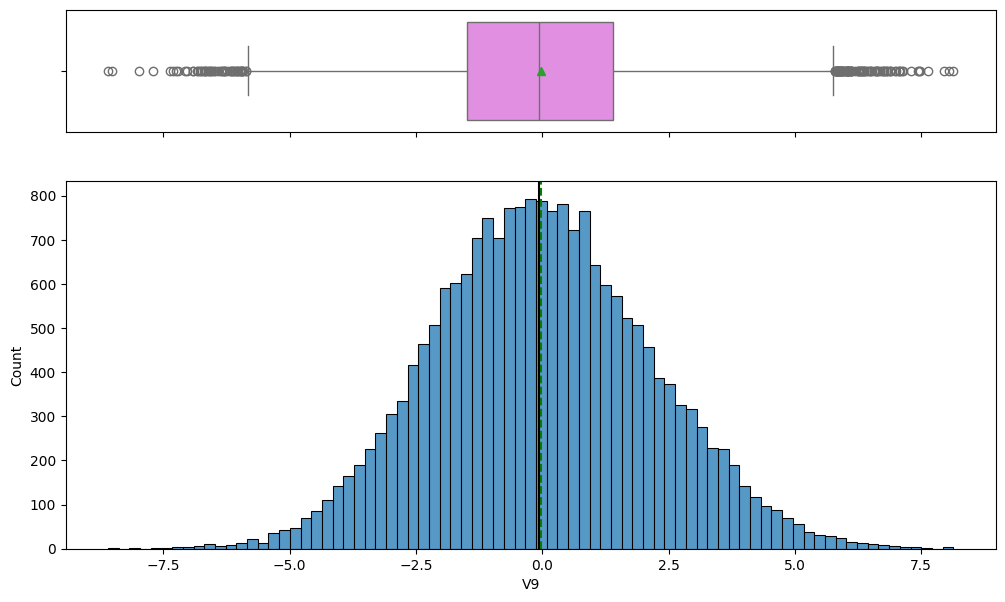

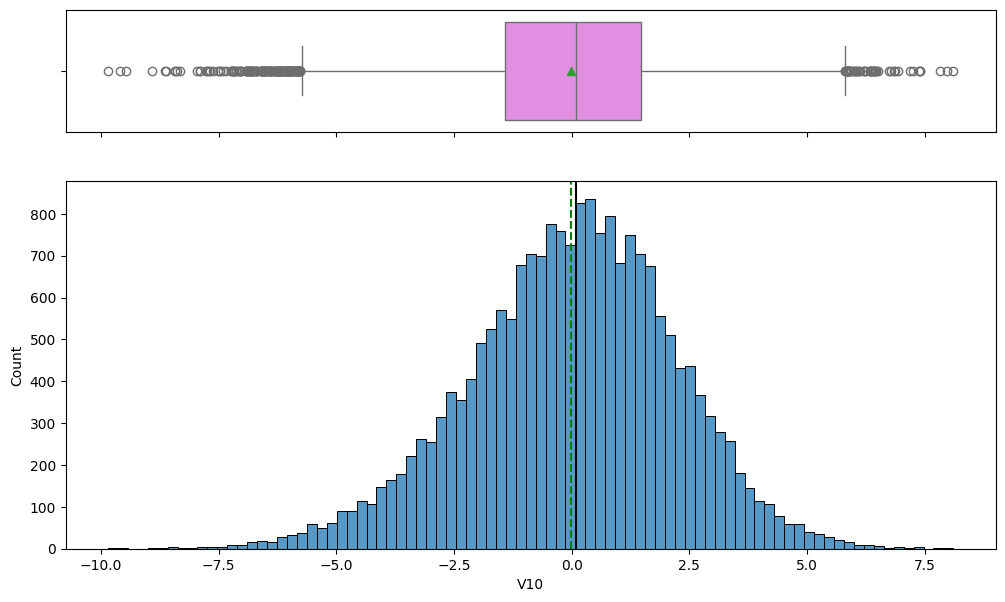

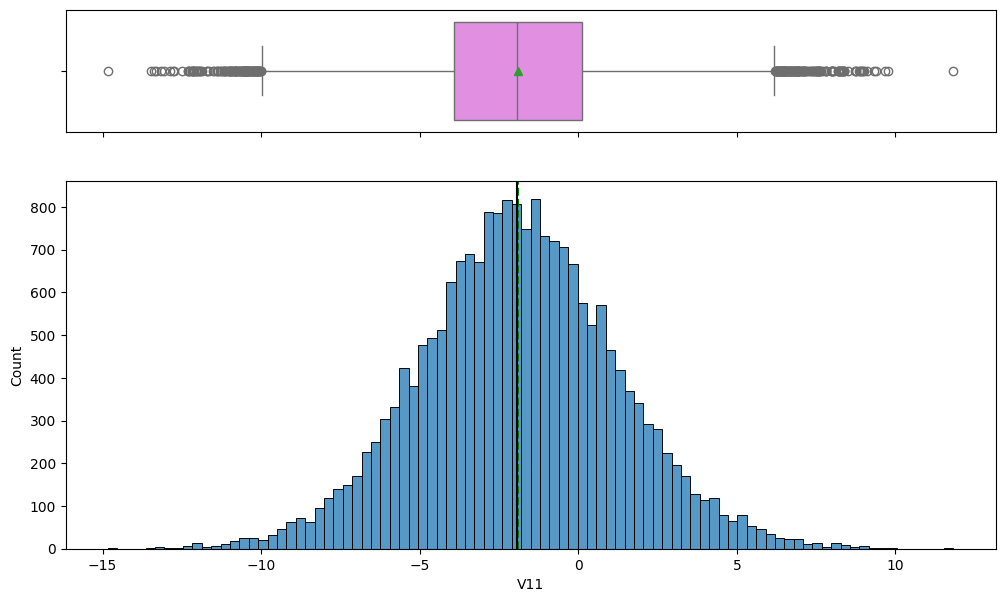

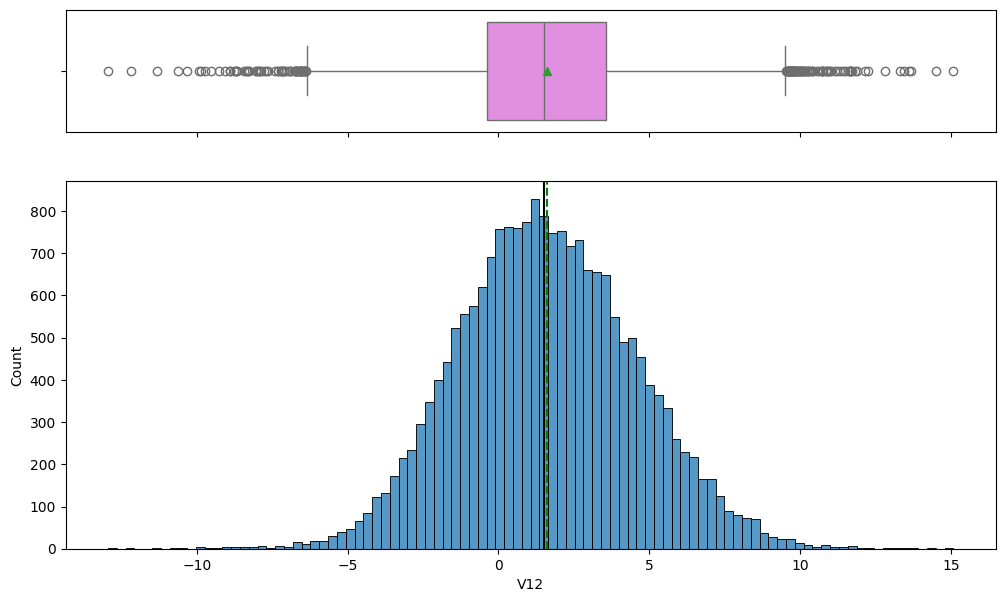

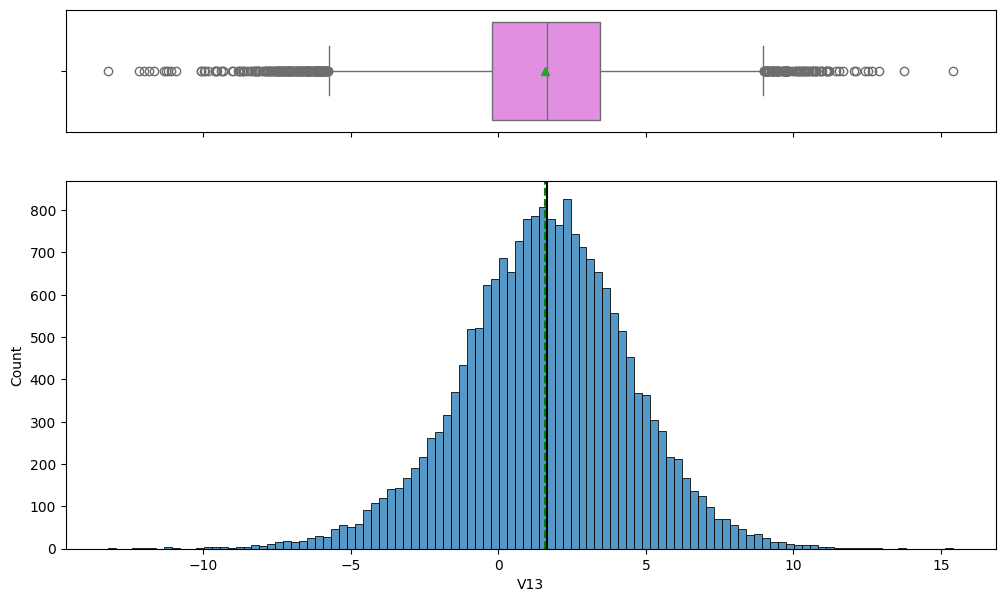

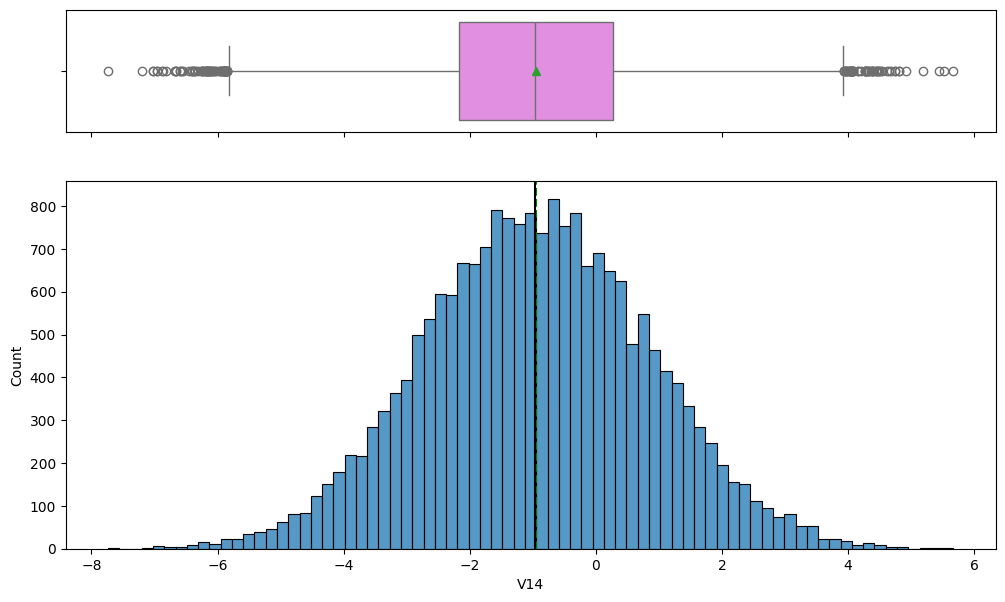

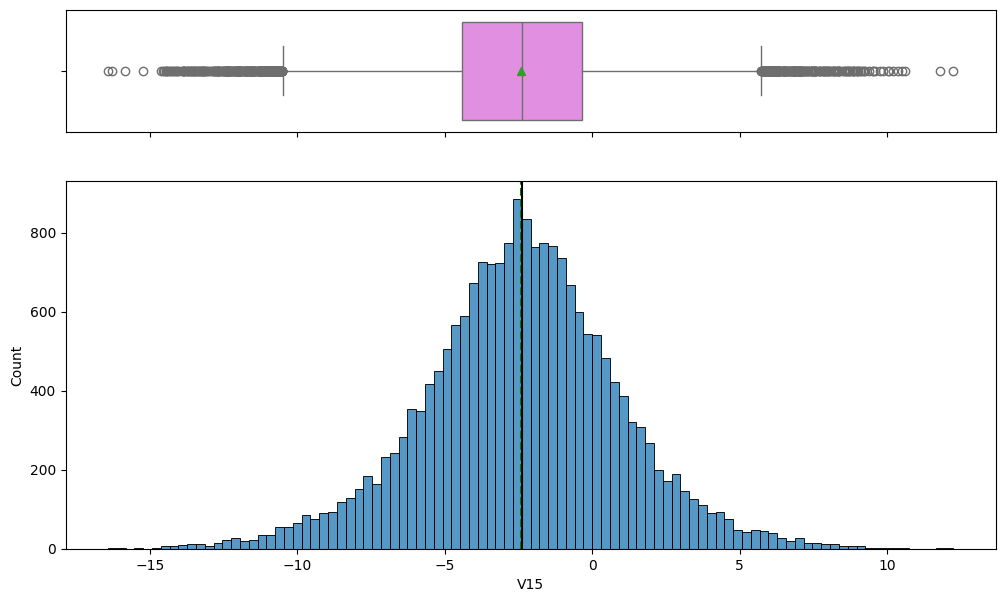

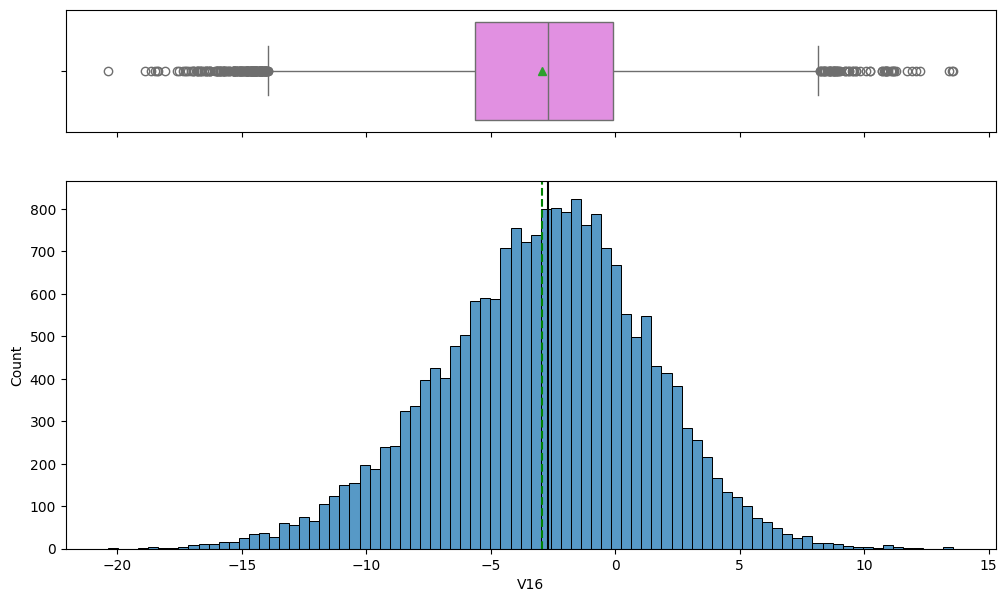

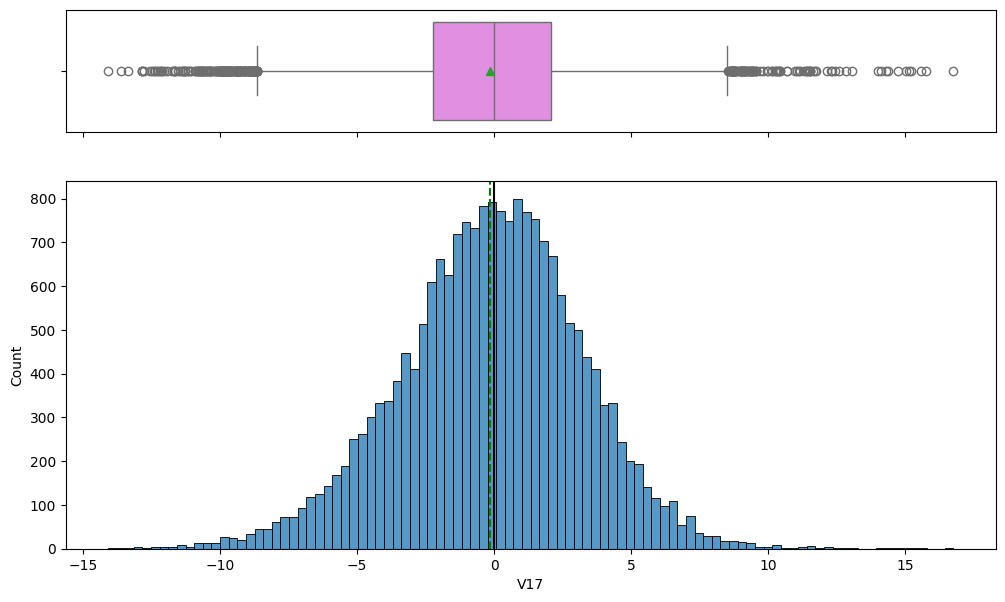

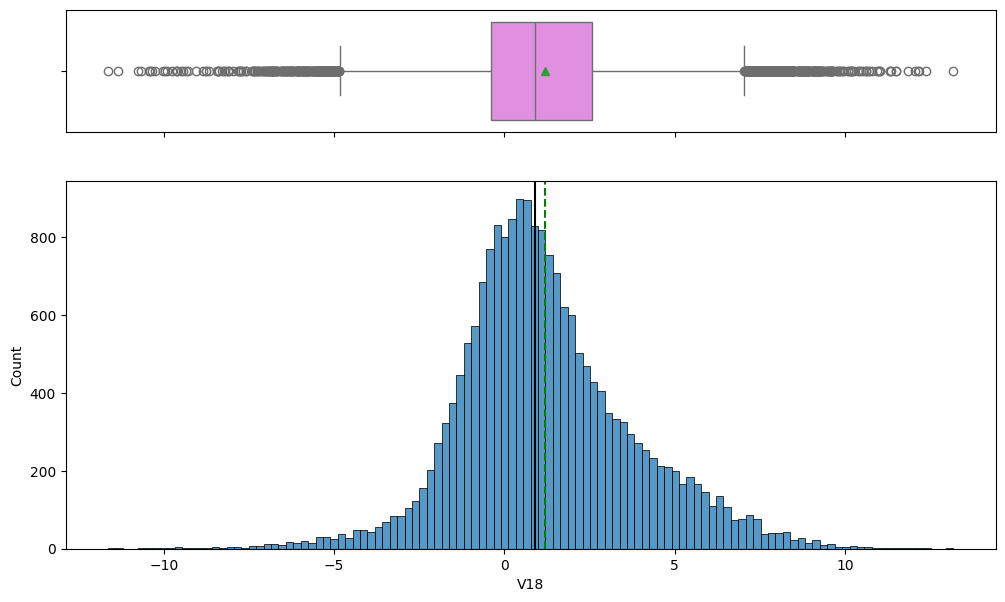

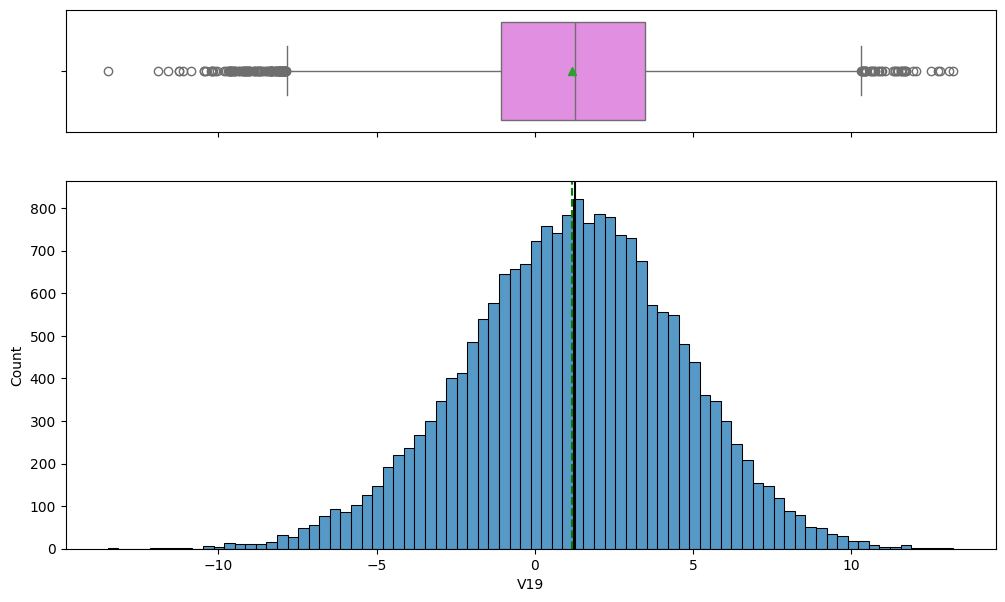

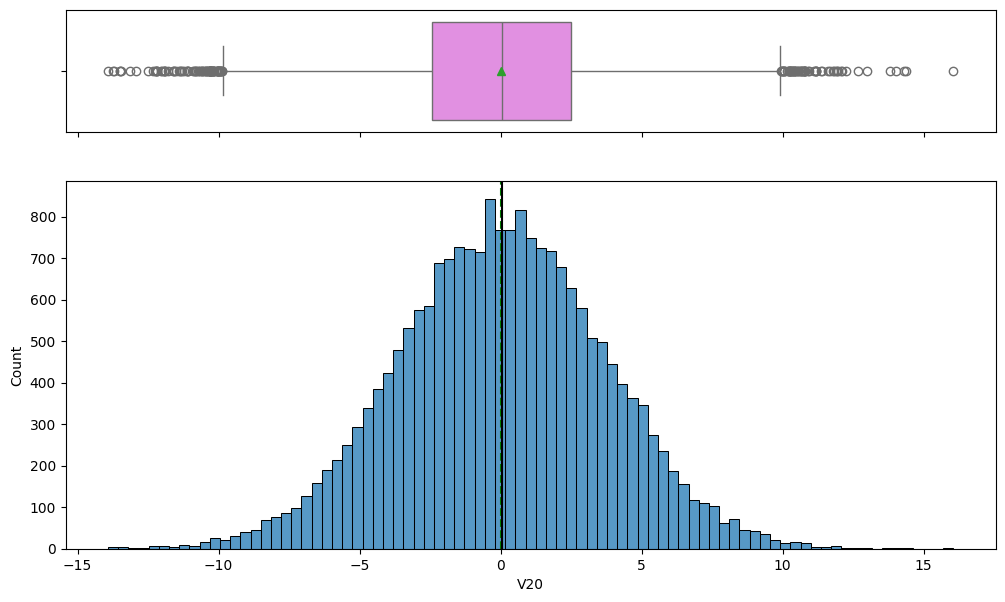

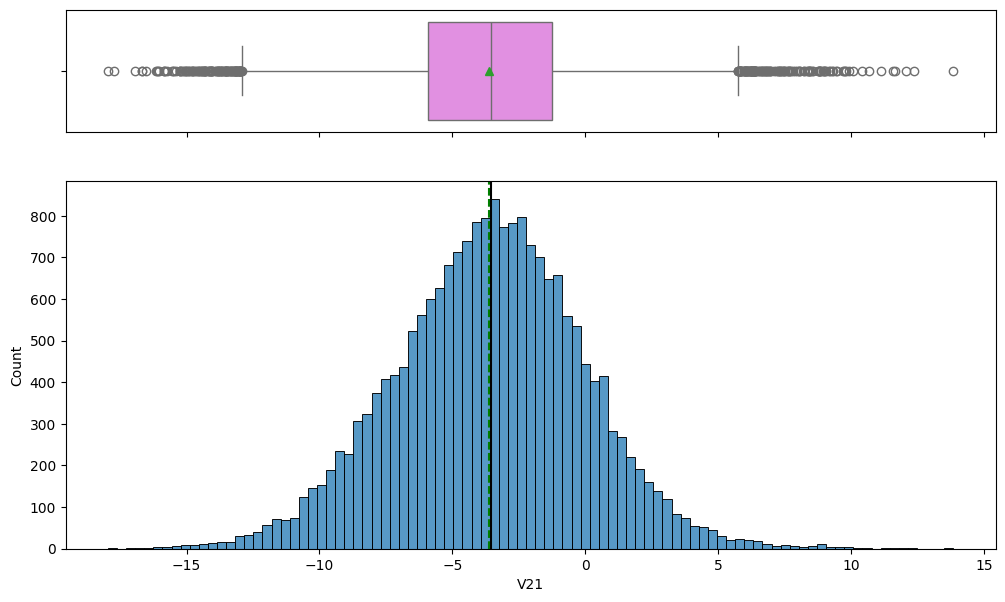

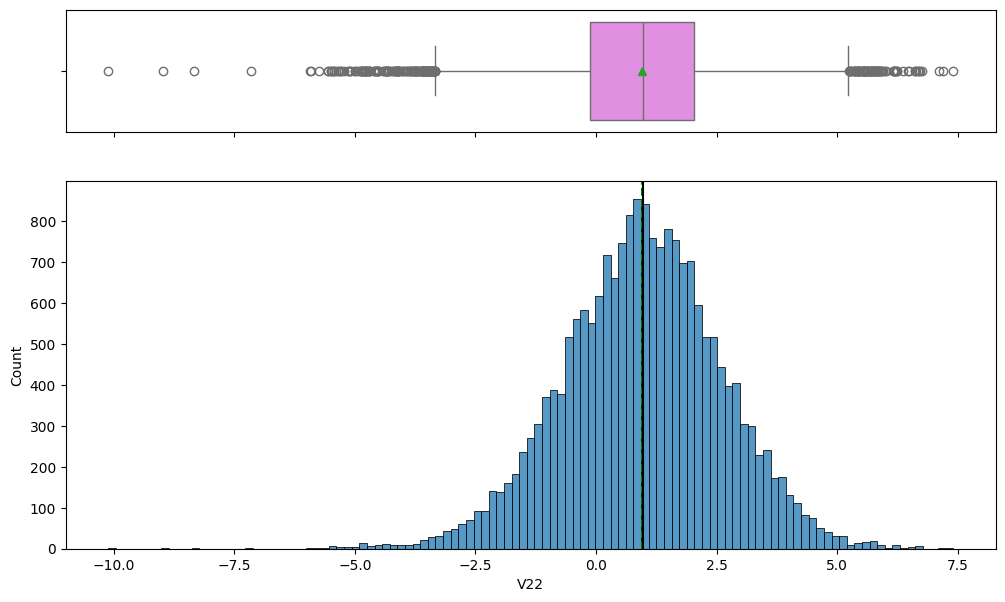

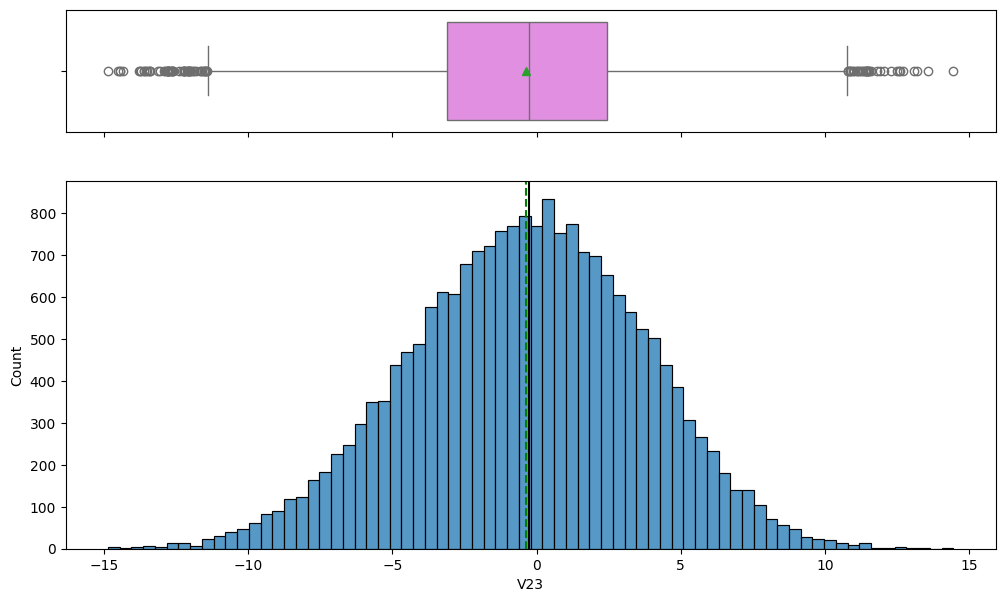

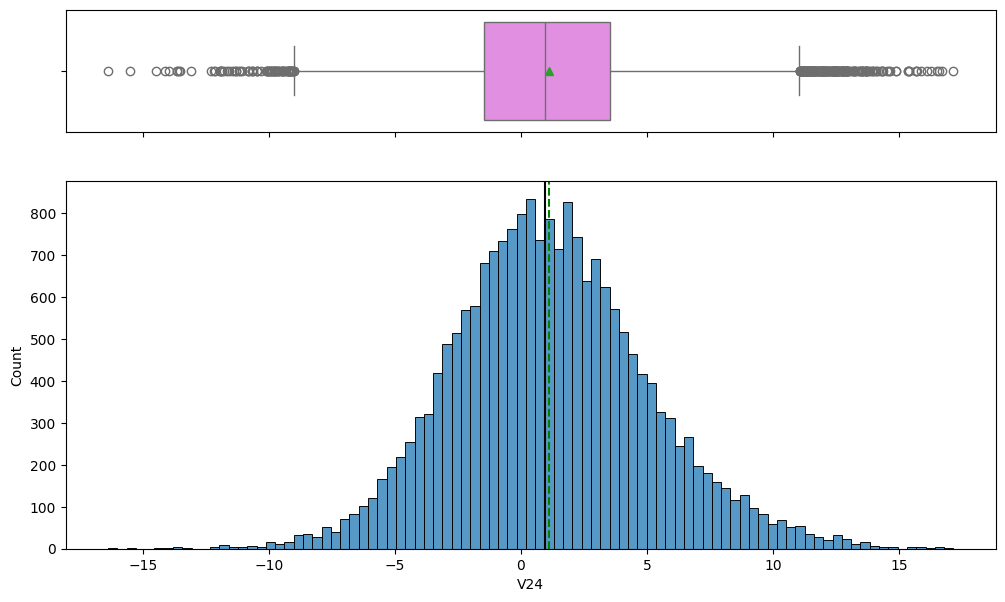

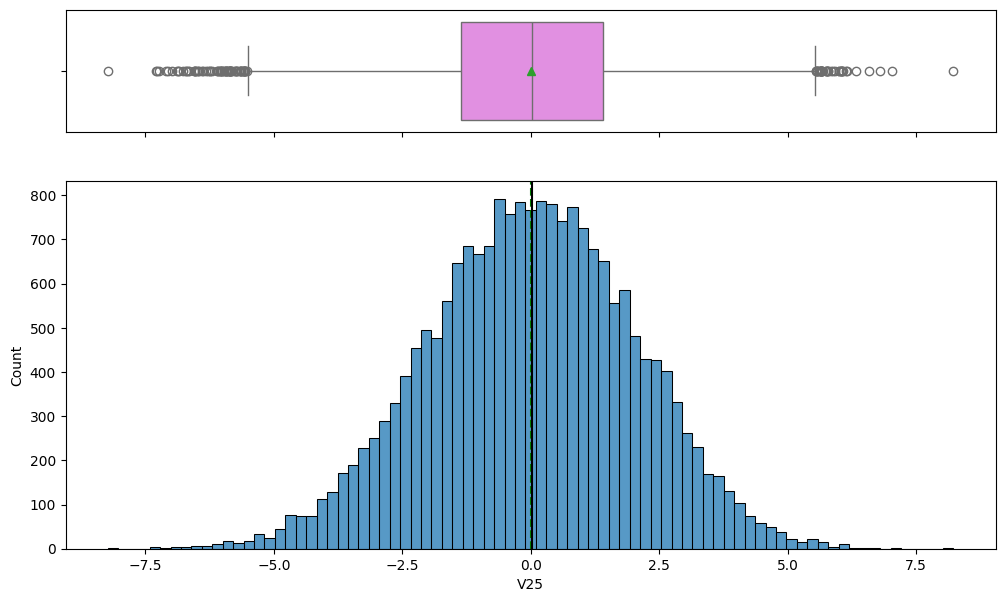

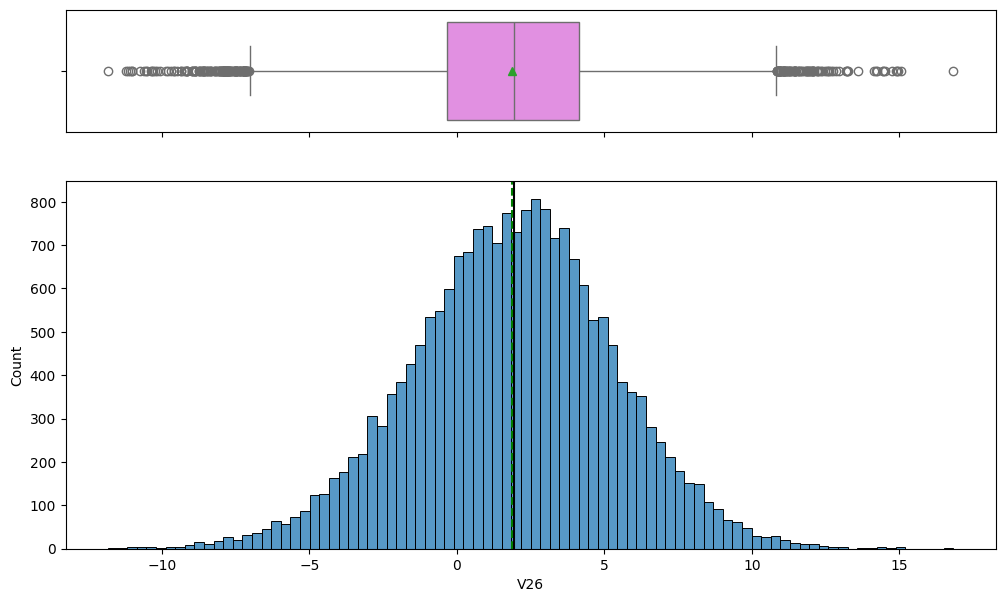

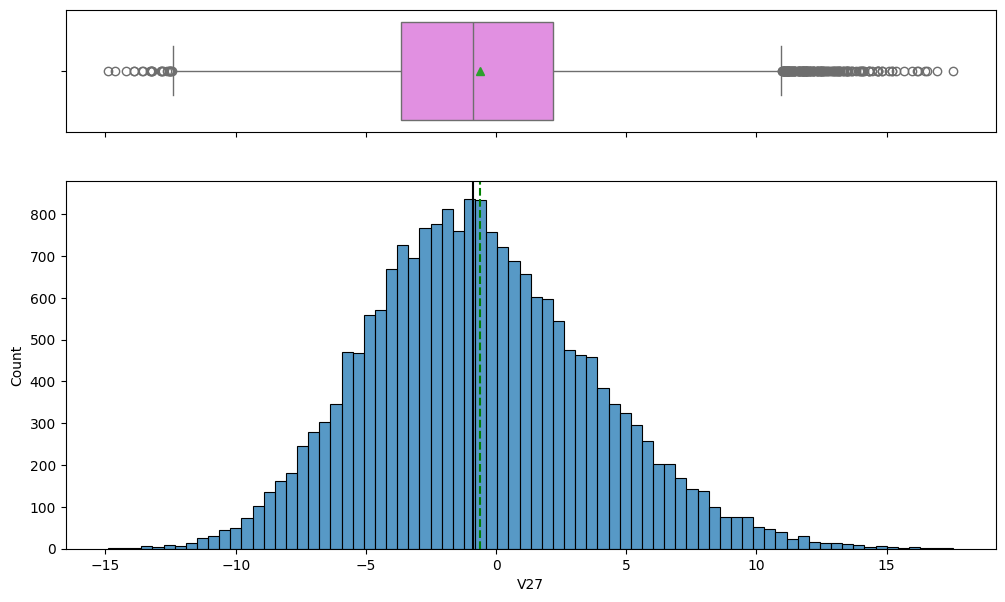

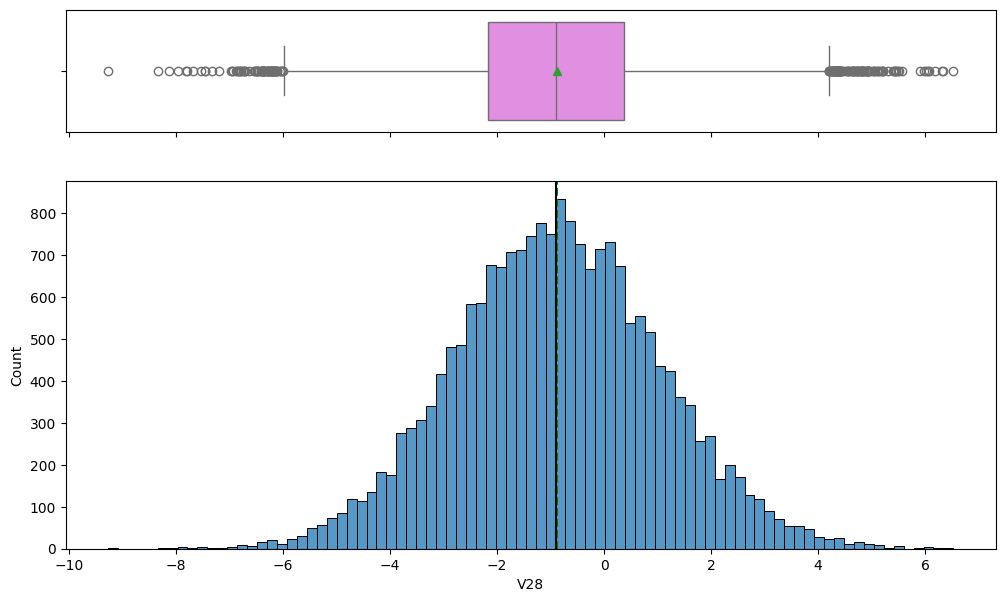

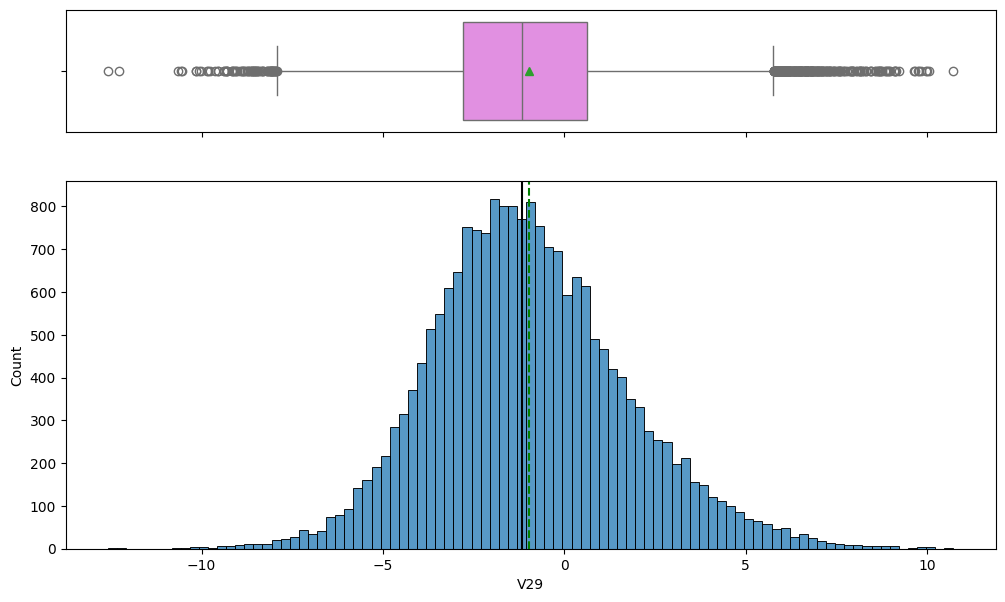

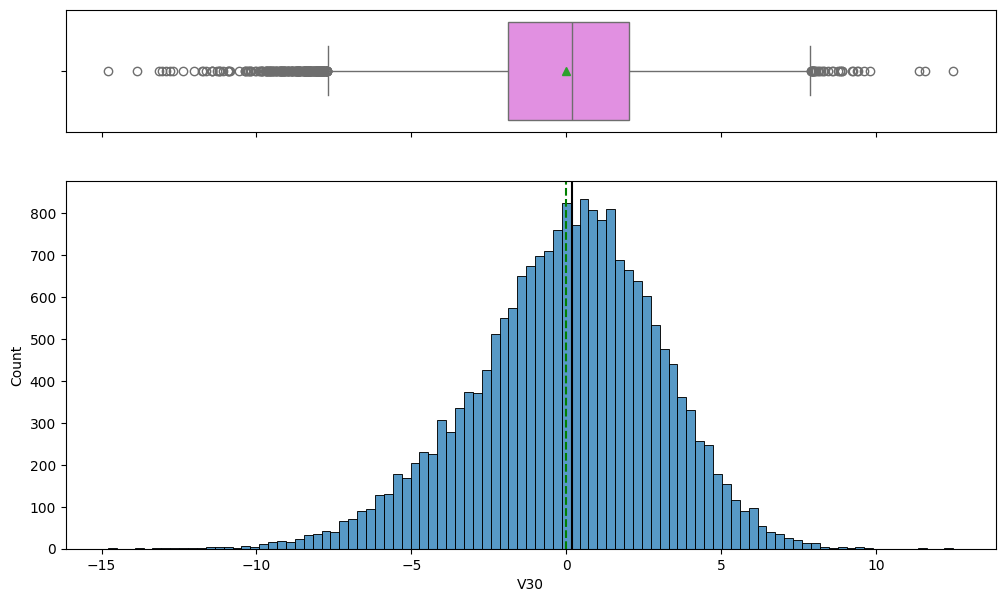

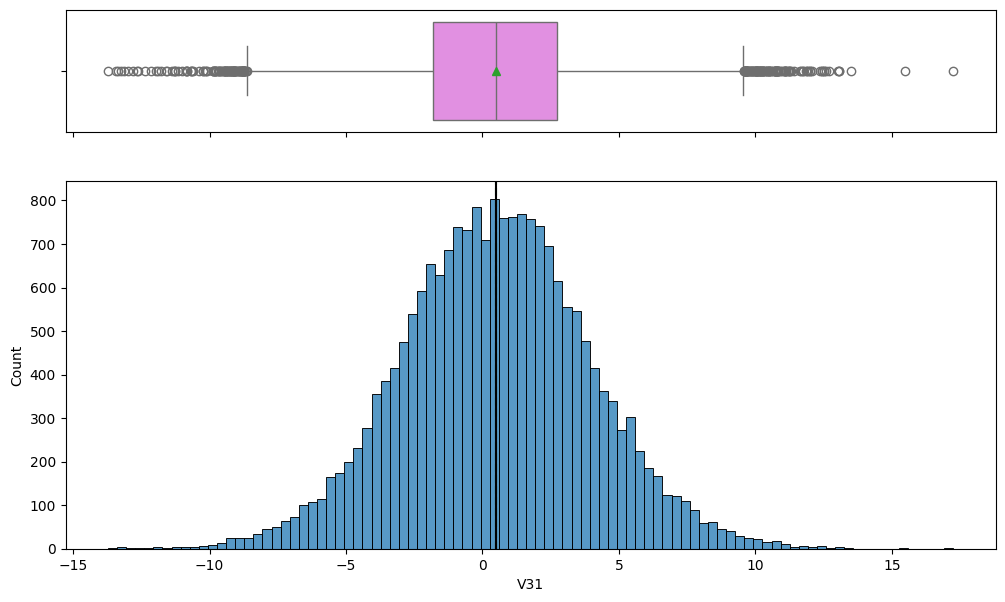

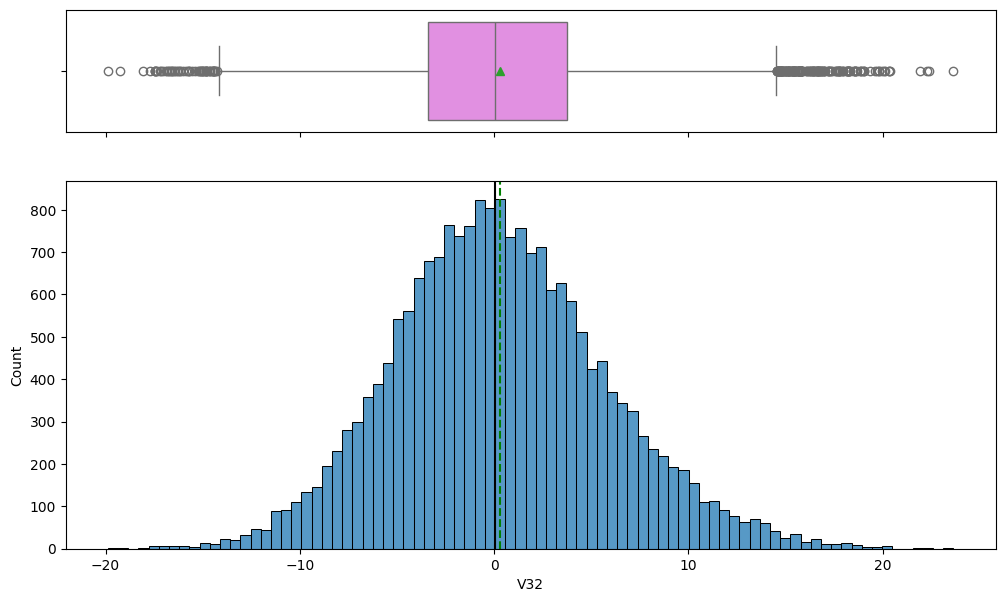

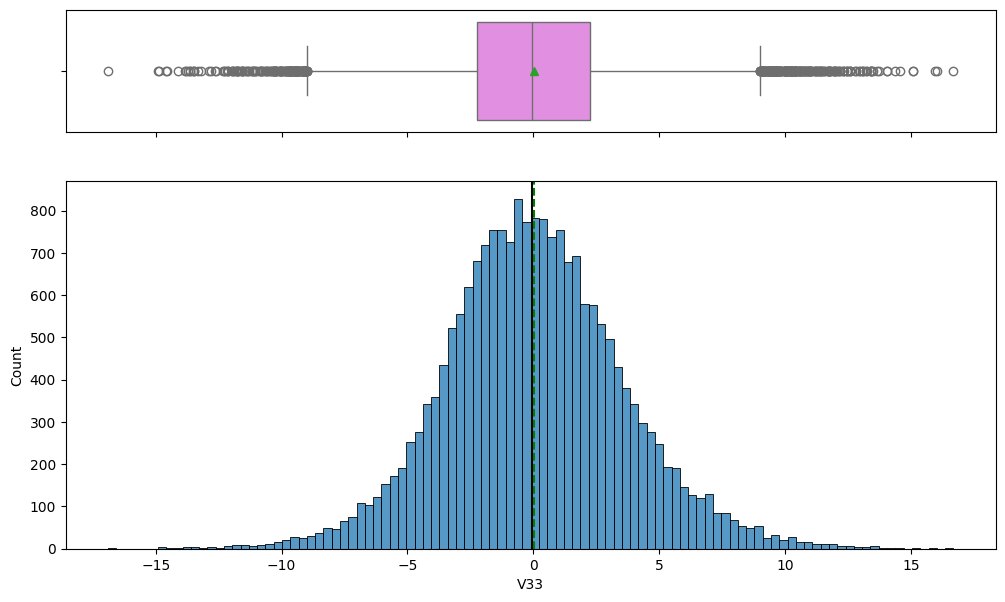

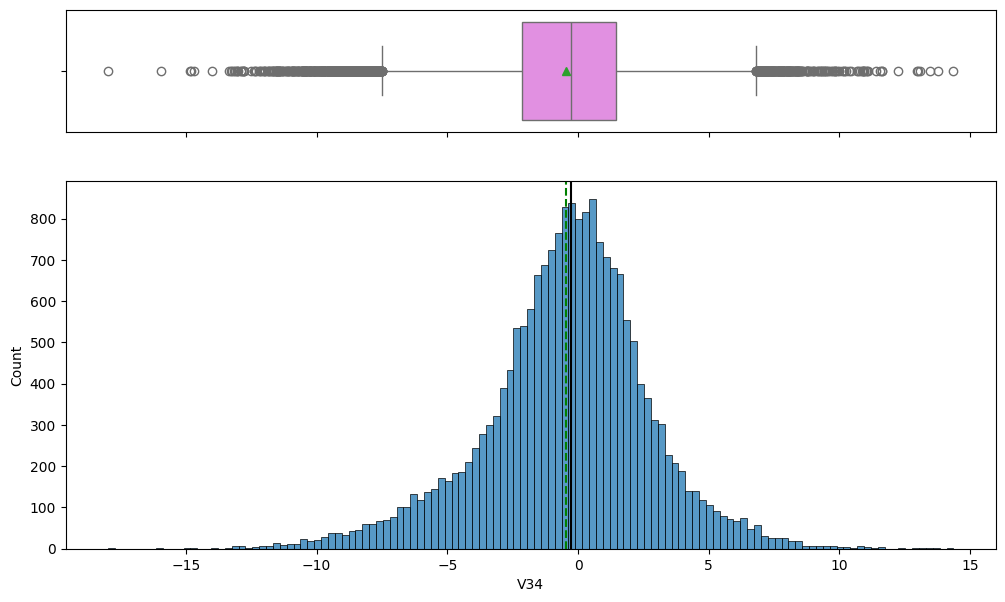

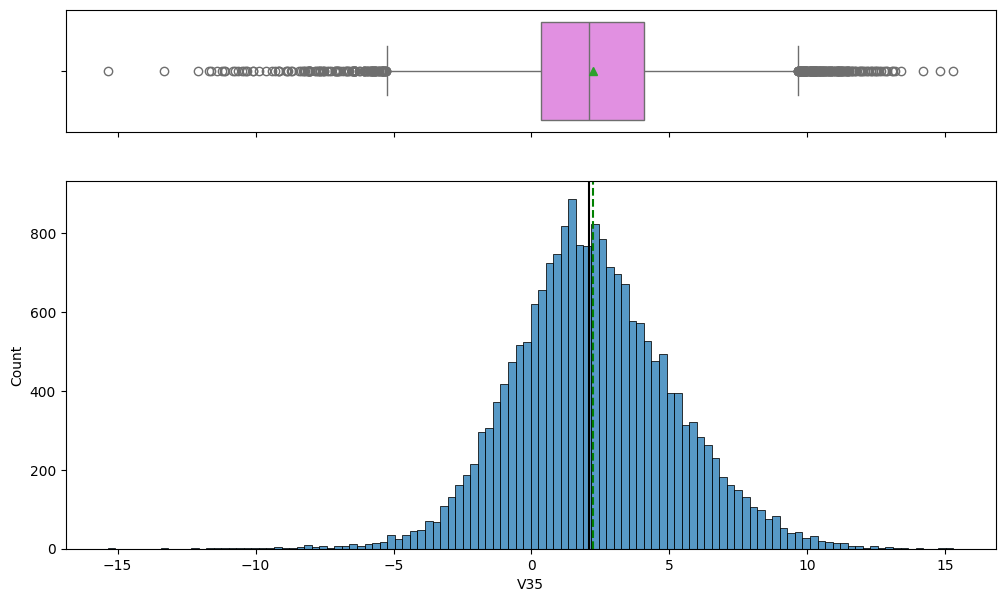

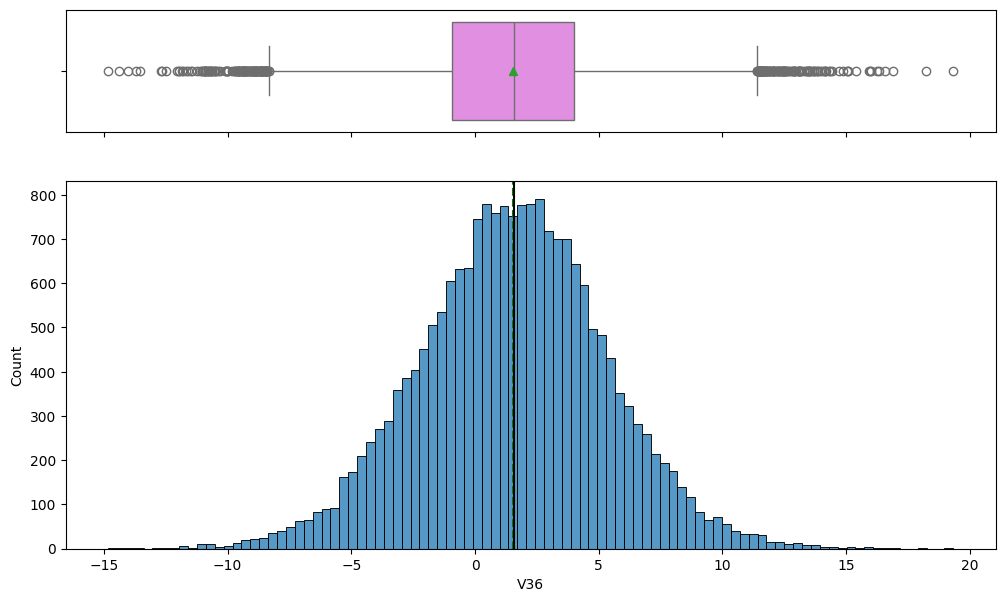

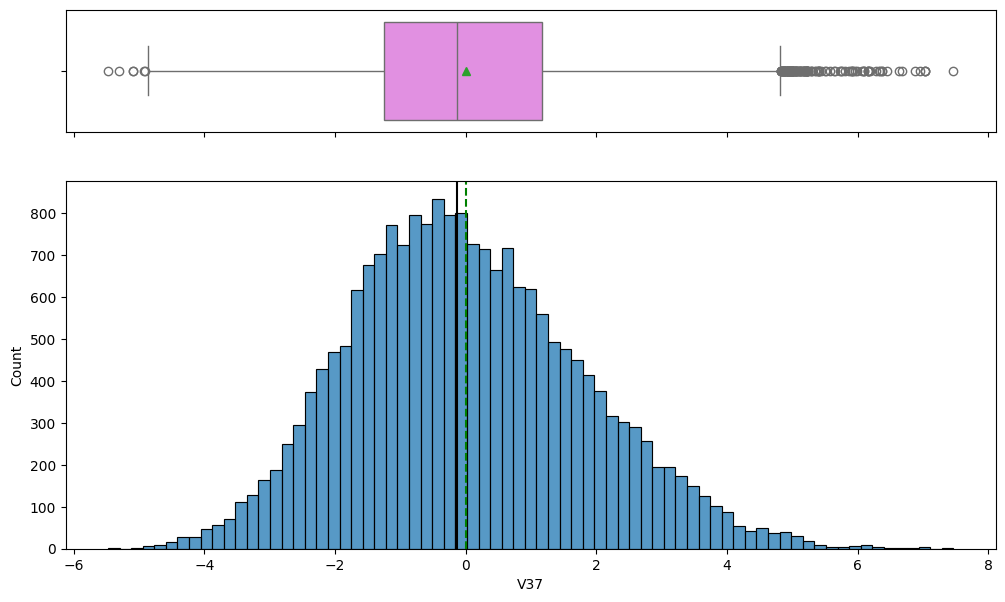

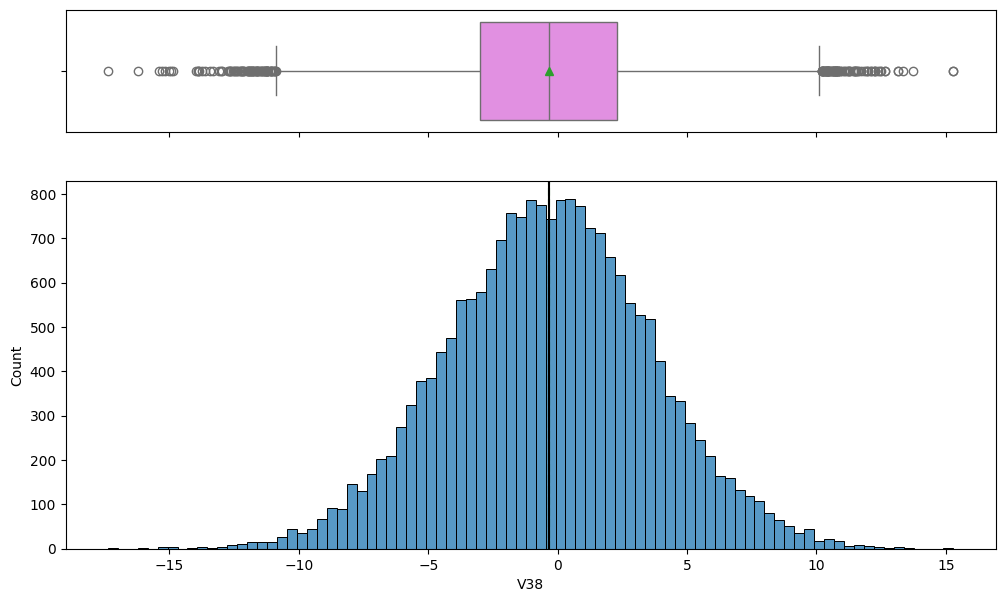

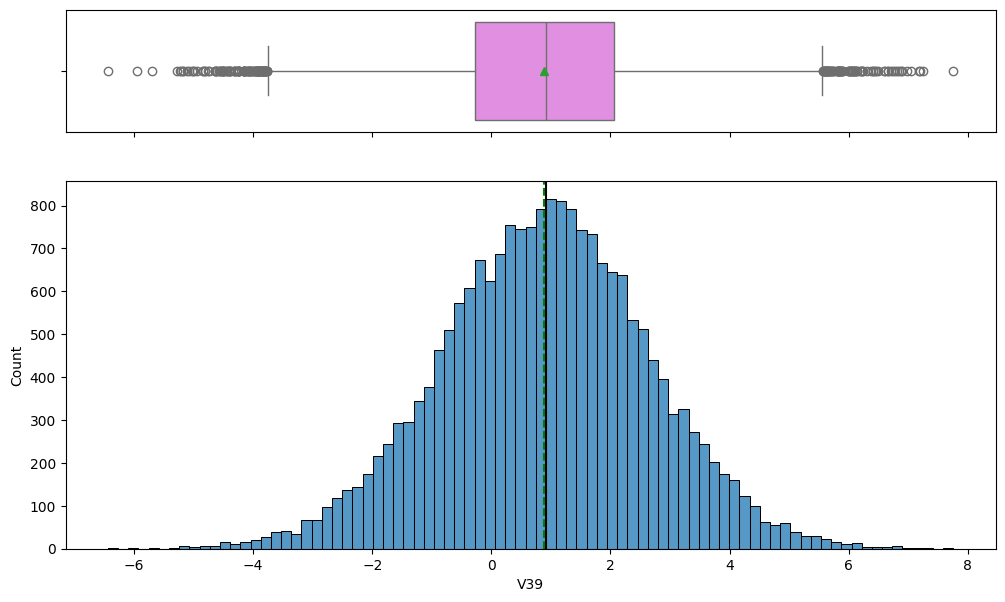

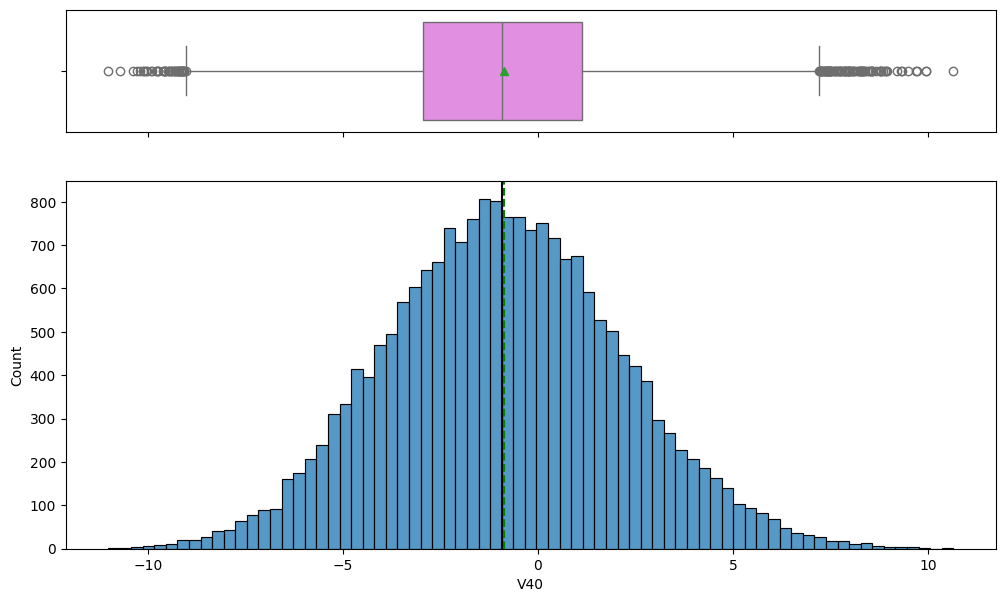

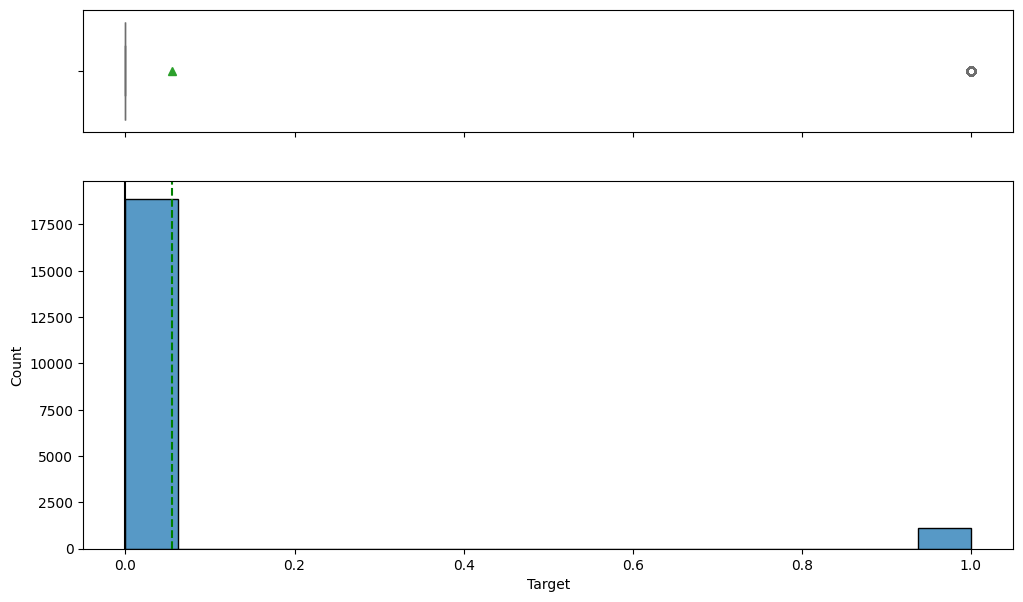

In [19]:
for feature in data.columns:
    histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None)

Observations:
*  Almost all the independent variables is shown have a normal distribution and have outliers in the positive and negative range


### Let's look at the values in target variable

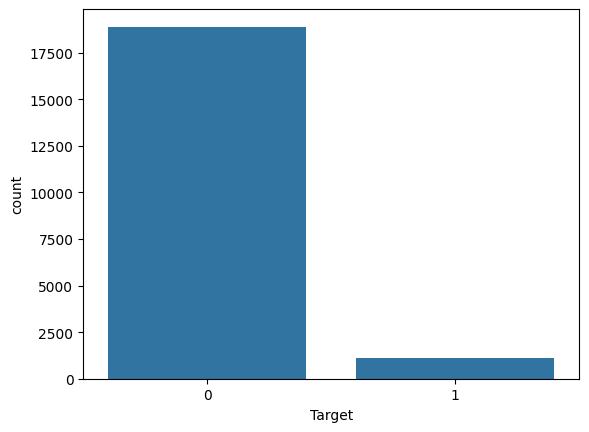

,count
Target,
0,18890
1,1110


In [20]:
sns.countplot(x="Target", data=data)
plt.show()
data["Target"].value_counts()

In [21]:
#Lets check the class distribution in target variable for train data
data['Target'].value_counts(normalize = True)

,proportion
Target,
0,0.945
1,0.056


* We can see that the distribution of classes in the target variable is imbalanced with 18890 or 94.5% "No Failures"(0) and 1110 or 5.55% Failures( 1)

In [22]:
# Lets check the class distribution in target variable for test data
data_test['Target'].value_counts(normalize = True)

,proportion
Target,
0,0.944
1,0.056


*  In the test data set also 94% of target variable has the value 0 and 6% of target variable has the value 1


###Bivariate Analysis

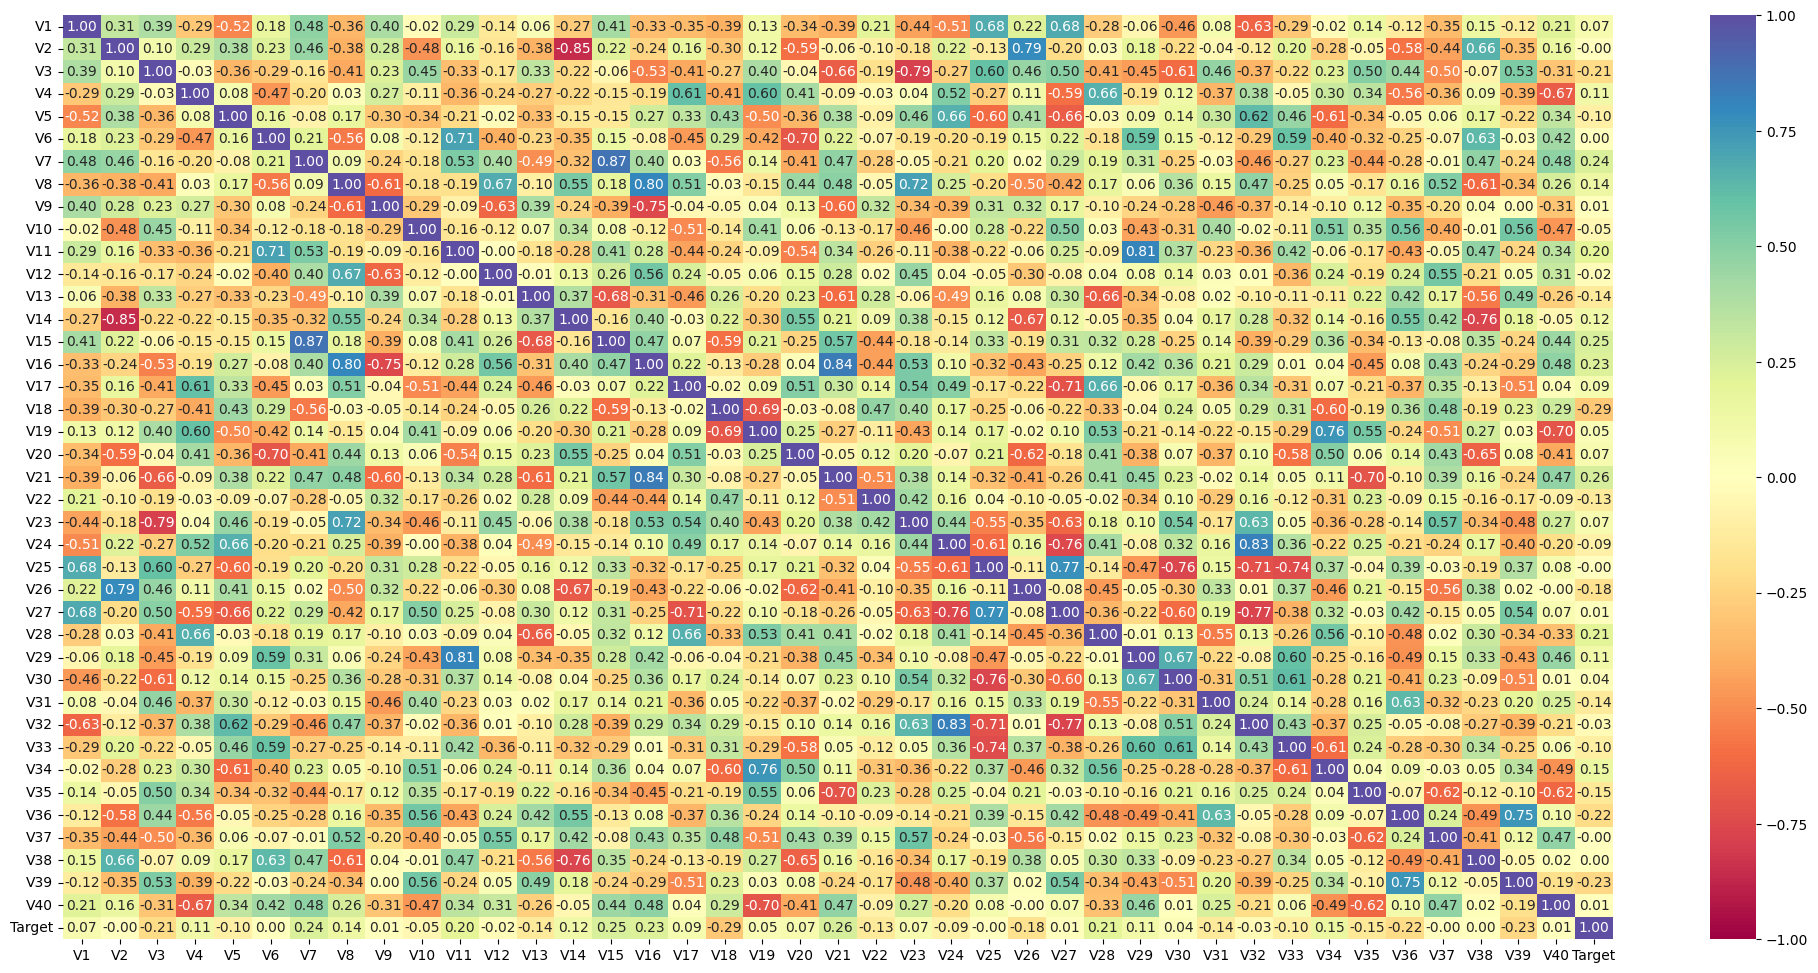

In [23]:
plt.figure(figsize=(25,12))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* None of the variables have any strong correlation with the target variable but some of the variables are strongly correlated to each other

## Data Pre-processing

In [24]:
# Dividing train data into X and y
X = data.drop(["Target"], axis=1)
y = data["Target"]

**Since we already have a separate test set, we don't need to divide data into train, valiation and test**

In [25]:
# Splitting train dataset into training and validation set in the eatio 75:25
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.25,random_state=1,stratify=y)

#Let us check the no of rows and columns in X_test and X_val
print("Number of rows in train data =", X_train.shape[0])
print("Number of columns in train data =", X_train.shape[1])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of columns in validation data =", X_val.shape[1])

Number of rows in train data = 15000
Number of columns in train data = 40
Number of rows in validation data = 5000
Number of columns in validation data = 40


In [26]:
# Dividing test data into X_test and y_test
X_test = data_test.drop(["Target"], axis=1)
y_test = data_test["Target"]

#Let us check the no of rows and columns in X_test
print("Number of rows in test data =", X_test.shape[0])
print("Number of columns in test data =", X_test.shape[1])

Number of rows in test data = 5000
Number of columns in test data = 40


## Missing value imputation




In [27]:


# creating an instace of the imputer to be used
imputer = SimpleImputer(strategy="median")

# Fit and transform the train data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# to impute missing values in X_val without data leakage
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_train.columns)

# to impute missing values in X_test without data leakage
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_train.columns)

In [28]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)

#Checking the count of missing values in validation set
print(X_val.isna().sum())
print("-" * 30)

#Checking the count of missing values in test set
print(X_test.isna().sum())


V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22

In [29]:
X_train.isnull().sum()

,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [30]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [31]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [32]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)


### Model Building with original data

In [32]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Logistic Regression", LogisticRegression(random_state=1)))
models.append(("Random Forest", RandomForestClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("XGB", XGBClassifier(random_state=1, eval_metric="logloss")))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))


print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))






Cross-Validation performance on training dataset:

dtree: 0.6982829521679532
Logistic Regression: 0.4927566553639709
Random Forest: 0.7235192266070268
Bagging: 0.7210807301060529
AdaBoost: 0.5371329629896833
GBM: 0.7066661857008874
XGB: 0.8100497799581561

Validation Performance:

dtree: 0.7050359712230215
Logistic Regression: 0.4856115107913669
Random Forest: 0.7266187050359713
Bagging: 0.7302158273381295
AdaBoost: 0.6007194244604317
GBM: 0.7230215827338129
XGB: 0.8309352517985612


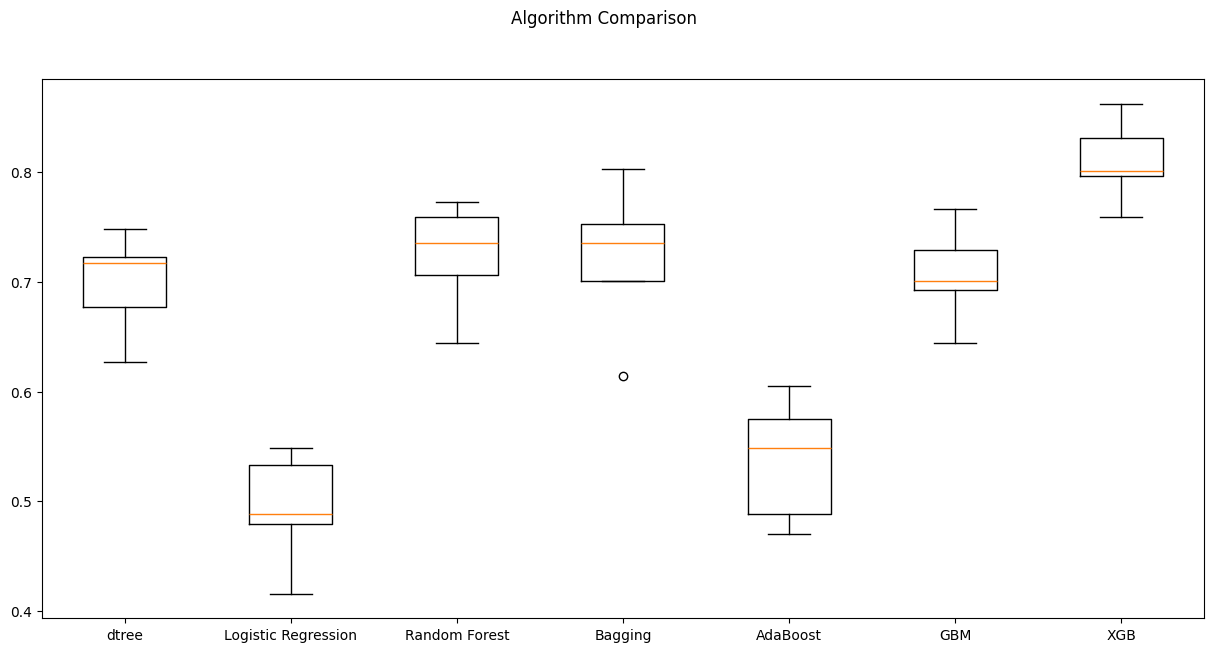

In [33]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize =(15,7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

*  We can see that the XGBBoost is giving the highest cross-validated recall score and the performance on the validation set is also good


### Model Building with Oversampled data


In [34]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [35]:
print("Before OverSampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, count of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_train_over == 0)))

print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, count of label '1': 832
Before OverSampling, count of label '0': 14168 

After OverSampling, count of label '1': 14168
After OverSampling, count of label '0': 14168 

After OverSampling, the shape of train_X: (28336, 40)
After OverSampling, the shape of train_y: (28336,) 



In [36]:
models_over = []  # Empty list to store all the models

# Appending models into the list
models_over.append(("dtree", DecisionTreeClassifier(random_state=1)))
models_over.append(("Logistic Regression", LogisticRegression(random_state=1)))
models_over.append(("Random Forest", RandomForestClassifier(random_state=1)))
models_over.append(("Bagging", BaggingClassifier(random_state=1)))
models_over.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models_over.append(("GBM", GradientBoostingClassifier(random_state=1)))
models_over.append(("XGB", XGBClassifier(random_state=1, eval_metric="logloss")))

results_over = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models_over

# loop through all models_over to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models_over:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results_over.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))


print("\n" "Validation Performance:" "\n")

for name, model in models_over:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))




Cross-Validation performance on training dataset:

dtree: 0.9720494245534969
Logistic Regression: 0.883963699328486
Random Forest: 0.9839075260047615
Bagging: 0.9762141471581656
AdaBoost: 0.891445687121811
GBM: 0.9256068151319724
XGB: 0.9891305241357218

Validation Performance:

dtree: 0.7769784172661871
Logistic Regression: 0.8489208633093526
Random Forest: 0.8489208633093526
Bagging: 0.8345323741007195
AdaBoost: 0.8597122302158273
GBM: 0.8776978417266187
XGB: 0.8669064748201439


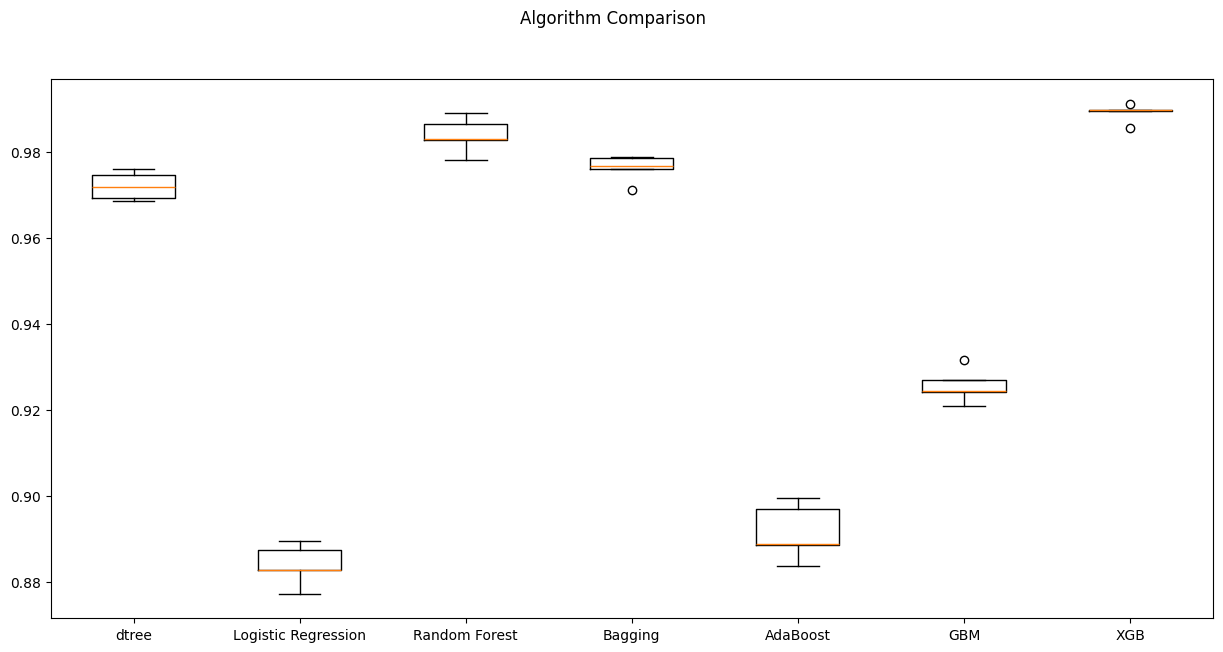

In [37]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(15, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results_over)
ax.set_xticklabels(names)

plt.show()

* Oversampling improved our cross-validated recall score across the board.
* It increased the performance on croos validation training and validation sets for Logistic Regression,Adaboost and GBM models
*  We can see that the XGBBoost is giving the highest cross-validated recall score followed by Bagging,Random Forest and GBM.But the validation recall score of these models are much lower than the cross validation on training recall score showing that these models are overfitting
* The Adaboost Classifier model is the best model among these models built on oversampled data as the recall score on validation data(.86) and cross validation recall score(.89) generalizes better compared to the other models

### Model Building with Undersampled data

In [33]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

In [39]:
models_under = []  # Empty list to store all the models

# Appending models into the list
models_under.append(("dtree", DecisionTreeClassifier(random_state=1)))
models_under.append(("Logistic Regression", LogisticRegression(random_state=1)))
models_under.append(("Random Forest", RandomForestClassifier(random_state=1)))
models_under.append(("Bagging", BaggingClassifier(random_state=1)))
models_under.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models_under.append(("GBM", GradientBoostingClassifier(random_state=1)))
models_under.append(("XGB", XGBClassifier(random_state=1, eval_metric="logloss")))

results_under = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models_under  to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models_under :
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_under, y=y_train_under, scoring=scorer, cv=kfold
    )
    results_under.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models_under :
    model.fit(X_train_under, y_train_under)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))




Cross-Validation performance on training dataset:

dtree: 0.8617776495202367
Logistic Regression: 0.8726138085275232
Random Forest: 0.9038669648654498
Bagging: 0.8641945025611427
AdaBoost: 0.8665969266286705
GBM: 0.8978572974532861
XGB: 0.9014717552846114

Validation Performance:

dtree: 0.841726618705036
Logistic Regression: 0.8525179856115108
Random Forest: 0.8920863309352518
Bagging: 0.8705035971223022
AdaBoost: 0.8633093525179856
GBM: 0.8884892086330936
XGB: 0.89568345323741


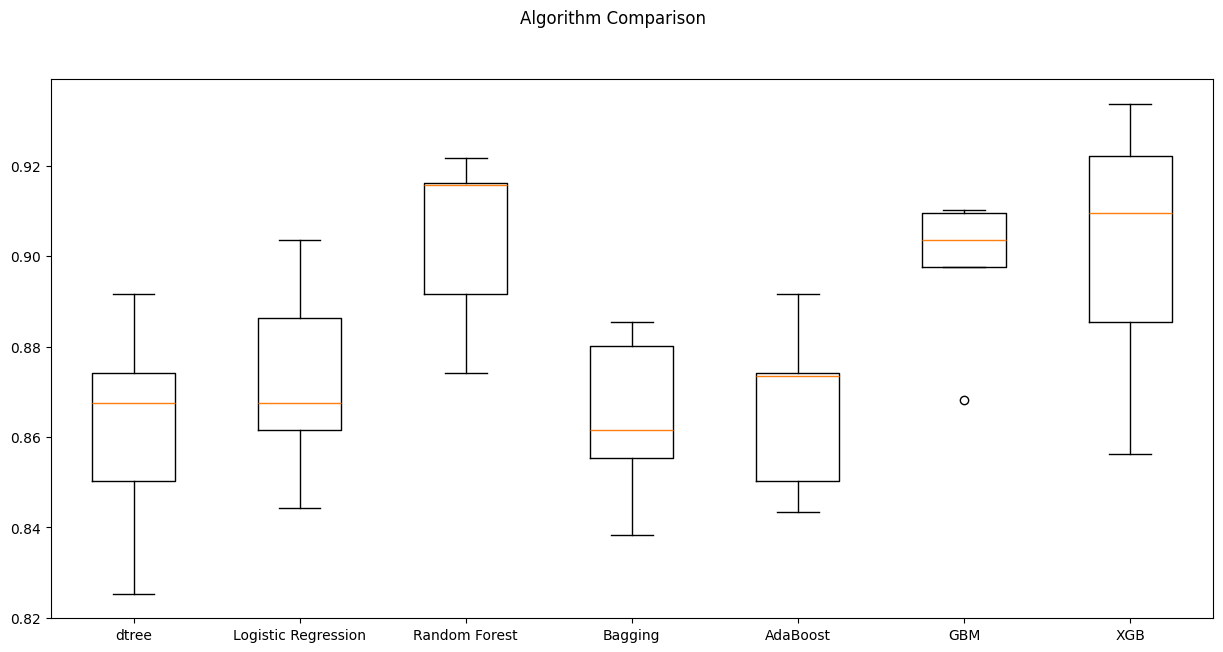

In [40]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(15, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results_under)
ax.set_xticklabels(names)

plt.show()

* Undersampling improved our cross-validated recall score across the board compared to the original dataset
* The effect of overfitting was less pronounced
*  We can see that the XGBBoost is giving the highest cross-validated recall score followed by GBM and Random Forest.The validation recall score of these models are closer to the cross validation score.This shows these models generalizes well

##Model Selection

* Majority of the models built on original and undersampled dataset have given generalized performance on cross validation training and validation sets .
* But the recall score that we got on Original dataset is lower compared to the recall score we obtained on undersampled data and oversampled data
* The models chosen for tuning are:
          *  XGBoost using original data
          *  Adaboost with oversampled data
          *  XGBoost using undersampled data
          *  Random Forest using undersampled data
          *  Gradient Boosting using undersampled data
*Reasons :

 *  Recall Validation scores  of all these models are the best in each category
 * Also the recall score from cross validation on training set and the recall score of validation set generalizes well,which shows the models are not overfitting


## HyperparameterTuning

## Tuning XGBoost with original data

In [41]:
# defining model
Model = XGBClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid={ 'n_estimators': [150, 200, 250], 'scale_pos_weight': [5,10], 'learning_rate': [0.1,0.2], 'gamma': [0,3,5], 'subsample': [0.8,0.9] }

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs=-1, scoring=scorer, cv=5, random_state=1)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

# display best params
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.1, 'gamma': 5} with CV score=0.8546353076978572:


In [42]:

# building tuned model with best parameters
xgb_tuned = XGBClassifier(
        random_state=1,
        eval_metric="logloss",
        subsample= 0.8,
        scale_pos_weight=10,
        n_estimators= 200,
        learning_rate= 0.1,
        gamma= 5)

# fit the tuned model
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=5, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [43]:
# Calculating different metrics on train set
xgbboost_train = model_performance_classification_sklearn(
    xgb_tuned, X_train_under, y_train_under)

print("Training performance:")
xgbboost_train


Training performance:


,Accuracy,Recall,Precision,F1
0,0.999,1.000,0.999,0.999


In [44]:
# Calculating different metrics on validation set
xgbboost_val = model_performance_classification_sklearn(xgb_tuned, X_val, y_val)
print("Validation performance:")
xgbboost_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.987,0.860,0.905,0.882


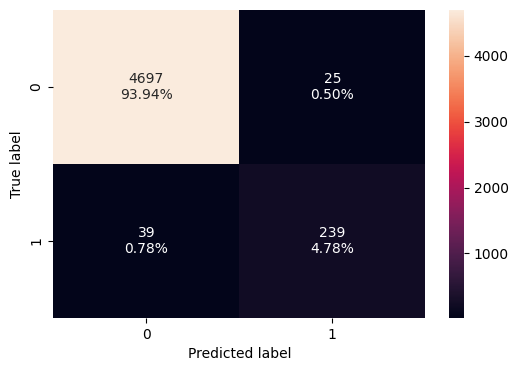

In [51]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned, X_val, y_val)

* The XGBoost with original data though overfitting the recall score and precision looks good

##Tuning Adaboost with oversampled data

In [54]:
# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),]
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

# display best params
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 200, 'learning_rate': 0.2, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9187607193274347:


In [55]:
# building tuned model with best parameters
ada_tuned_over = AdaBoostClassifier(
    n_estimators=200,
    learning_rate=.2,
    estimator=DecisionTreeClassifier(max_depth=3, random_state=1)
)

# fit the tuned model
ada_tuned_over.fit(X_train_over, y_train_over)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.2, n_estimators=200)

In [56]:
# Calculating different metrics on train set
adaboost_over_train = model_performance_classification_sklearn(
    ada_tuned_over, X_train_over, y_train_over)

print("Training performance:")
adaboost_over_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.941,0.918,0.963,0.940


In [57]:
# Calculating different metrics on validation set
adaboost_over_val = model_performance_classification_sklearn(ada_tuned_over, X_val, y_val)
print("Validation performance:")
adaboost_over_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.949,0.878,0.526,0.658


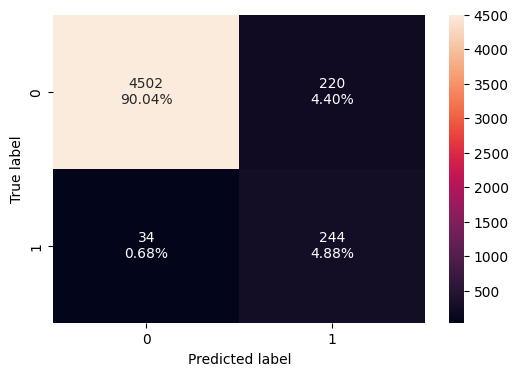

In [58]:
# creating confusion matrix
confusion_matrix_sklearn(ada_tuned_over, X_val, y_val)

### Tuning XGBBoost using undersampled data

In [59]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':[150,200,250],'scale_pos_weight':[5,10], 'learning_rate':[0.1,0.2], 'gamma':[0,3,5], 'subsample':[0.8,0.9]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_under,y_train_under)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.1, 'gamma': 5} with CV score=0.9290599523843879:
CPU times: user 3.53 s, sys: 268 ms, total: 3.79 s
Wall time: 2min 29s


In [60]:
# building tuned model with best parameters
xgbboost_un_tuned = XGBClassifier(
        random_state=1,
        eval_metric="logloss",
        subsample= 0.9,
        scale_pos_weight=10,
        n_estimators= 200,
        learning_rate= 0.1,
        gamma= 5)
# Fit the model on training data
xgbboost_un_tuned.fit(X_train_under, y_train_under)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=5, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [61]:
# Calculating different metrics on train set
xgbboost_un_train = model_performance_classification_sklearn(
    xgbboost_un_tuned, X_train_under, y_train_under)

print("Training performance:")
xgbboost_un_train


Training performance:


,Accuracy,Recall,Precision,F1
0,0.979,1.000,0.960,0.979


In [62]:
# Calculating different metrics on validation set
xgbboost_un_val = model_performance_classification_sklearn(xgbboost_un_tuned, X_val, y_val)
print("Validation performance:")
xgbboost_un_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.832,0.921,0.239,0.379


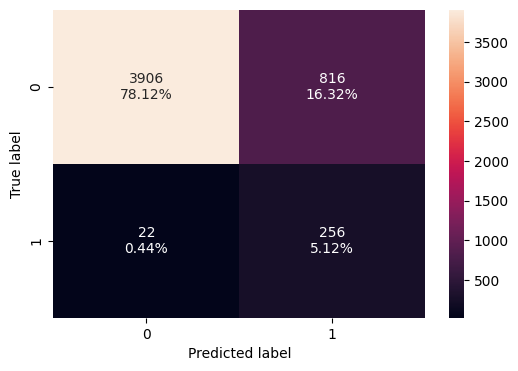

In [63]:
# creating confusion matrix
confusion_matrix_sklearn(xgbboost_un_tuned, X_val, y_val)

*  The validation recall score is ~.92 which is very good but the Training recall score is 1 which shows the model is overfitting

### Tuning Gradient Boosting using undersampled data

In [46]:
%%time

# defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid={"n_estimators": np.arange(100,150,25), "learning_rate": [0.2, 0.05, 1], "subsample":[0.5,0.7], "max_features":[0.5,0.7]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, scoring=scorer, n_iter=50, n_jobs = -1, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_under, y_train_under)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': np.int64(125), 'max_features': 0.7, 'learning_rate': 0.2} with CV score=0.903816463458625:
CPU times: user 1.81 s, sys: 68.1 ms, total: 1.88 s
Wall time: 1min


In [33]:
# building tuned model with best parameters
gbm_tuned = GradientBoostingClassifier(
    max_features = 0.7,
    random_state = 1,
    learning_rate = 0.2,
    n_estimators = np.int64(125),
    subsample=0.7,)
gbm_tuned.fit(X_train_under, y_train_under)

GradientBoostingClassifier(learning_rate=0.2, max_features=0.7,
                           n_estimators=np.int64(125), random_state=1,
                           subsample=0.7)

In [64]:
# Calculating different metrics on train set
gbm_train = model_performance_classification_sklearn(
    gbm_tuned, X_train_under, y_train_under)

print("Training performance:")
gbm_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.995,0.990,0.999,0.995


In [65]:
# Calculating different metrics on validation set
gbm_val = model_performance_classification_sklearn(gbm_tuned, X_val, y_val)
print("Validation performance:")
gbm_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.927,0.885,0.423,0.573


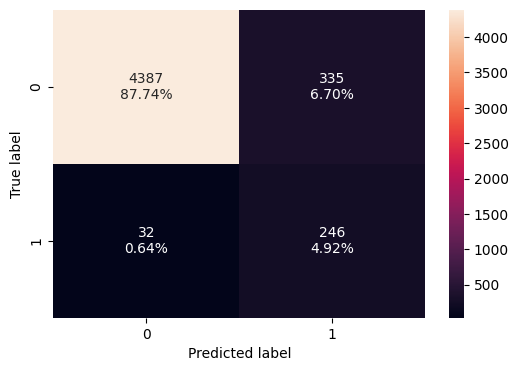

In [66]:
# creating confusion matrix
confusion_matrix_sklearn(gbm_tuned, X_val, y_val)

*  The validation recall score is ~.89 which is very good but the Training recall score is .99 which shows the **model is overfitting**

### Tuning Random forest using undersampled data

In [67]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_under,y_train_under)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 300, 'min_samples_leaf': np.int64(2), 'max_samples': np.float64(0.5), 'max_features': 'sqrt'} with CV score=0.8990116153235697:


In [68]:
# building tuned model with best parameters
rf_tuned = RandomForestClassifier(
    max_features='sqrt',
    random_state=1,
    max_samples= np.float64(0.5),
    n_estimators = 300,
    min_samples_leaf= np.int64(2),
)

rf_tuned.fit(X_train_under, y_train_under)

RandomForestClassifier(max_samples=np.float64(0.5),
                       min_samples_leaf=np.int64(2), n_estimators=300,
                       random_state=1)

In [69]:
# Calculating different metrics on train set
rf_train = model_performance_classification_sklearn(
   rf_tuned, X_train_under, y_train_under)

print("Training performance:")
rf_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.961,0.933,0.989,0.960


In [70]:
# Calculating different metrics on validation set
rf_val = model_performance_classification_sklearn(rf_tuned, X_val, y_val)
print("Validation performance:")
rf_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.938,0.885,0.468,0.612


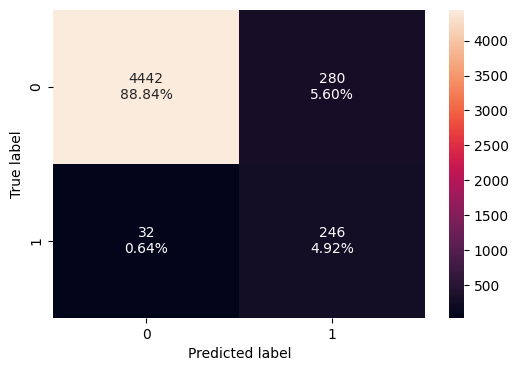

In [71]:
# creating confusion matrix
confusion_matrix_sklearn(rf_tuned, X_val, y_val)

*  The validation recall score is ~.89 which is very good but the Training recall score is .93 which shows the model is only slightly overfitting  compared to the Gradient Boosting and XGM model

**We have now tuned all the models, let's compare the performance of all tuned models and see which one is the best.**

## Model performance comparison and choosing the final model

In [72]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        xgbboost_train.T,
        adaboost_over_train.T,
        xgbboost_un_train.T,
        gbm_train.T,
        rf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "XGBoost tuned with original data",
    "AdaboostClassifier with oversampled data",
    "XGBoost tuned with undersampled data",
    "Gradient Boosting tuned with undersampled data",
    "Random forest tuned with undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,XGBoost tuned with original data,AdaboostClassifier with oversampled data,XGBoost tuned with undersampled data,Gradient Boosting tuned with undersampled data,Random forest tuned with undersampled data
Accuracy,0.999,0.941,0.979,0.995,0.961
Recall,1.000,0.918,1.000,0.990,0.933
Precision,0.999,0.963,0.960,0.999,0.989
F1,0.999,0.940,0.979,0.995,0.960


In [74]:
# validation set performance comparison

models_val_comp_df = pd.concat(
    [
        xgbboost_val.T,
        adaboost_over_val.T,
        xgbboost_un_val.T,
        gbm_val.T,
        rf_val.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "XGBoost tuned with original data",
    "AdaboostClassifier with oversampled data",
    "XGBoost tuned with undersampled data",
    "Gradient Boosting tuned with undersampled data",
    "Random forest tuned with undersampled data",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,XGBoost tuned with original data,AdaboostClassifier with oversampled data,XGBoost tuned with undersampled data,Gradient Boosting tuned with undersampled data,Random forest tuned with undersampled data
Accuracy,0.987,0.949,0.832,0.927,0.938
Recall,0.860,0.878,0.921,0.885,0.885
Precision,0.905,0.526,0.239,0.423,0.468
F1,0.882,0.658,0.379,0.573,0.612


*  Even though Validation Recall score is highest for **XGBoost tuned with undersampled data**,it is overfitting and the precision score is too low(~.24)

* **The Random Forest Model tuned with undersampled data** is a good model as it is giving best validation recall of .89 and training recall score .93 but the validation precision is low(.47).

* **The XGBoost model tuned on original data** has a Validation Recall score of .86,but the recall score on the training set is 1,showing the model is overfitting.But the precision and F1Score of this model was the highest

* **The Gradient model tuned on undersampled data** has a Validation Recall score of .89,but the recall score on the training set is .99,showing the model is overfitting.But the precision is also low

* **The Adaboost Classifier model tuned on oversampled data** has a Validation Recall score of ~.88,but the recall score on the training set is .92,showing the model is only slightly overfitting.

* **The Random Forest Model tuned with undersampled data** is chosen as the **best model** as the Validation Recall score is good  and the model is only slightly overfitting.Higher Recall score would mean lower Number of False negatives ie lower Replacement costs.But its low Precision can result in more number of inspections .But it is much less costlier compared to the Replcement costs


## Test set final performance

*Let us check the performance of the model Random Forest Model tuned with undersampled data on the test data

In [80]:
# Calculating different metrics on the test set for The Random Forest Model tuned with undersampled data
rf_test = model_performance_classification_sklearn(rf_tuned, X_test, y_test)
print("Test performance:")
rf_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.944,0.879,0.500,0.638


In [81]:
# Calculating different metrics on the test set The Adaboost Classifier model tuned on oversampled data
adaboost_test = model_performance_classification_sklearn(ada_tuned_over, X_test, y_test)
print("Test performance:")
adaboost_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.951,0.858,0.540,0.663


*  **Random Forest tuned with Random Search on undersampled data Model**  is the best model giving good recall score of .88 on test set , .89 on Validation set and .93 on training set.ie the model generalizes well with the performance on the validation and test data
* On testing on the test set,the Precision score of this model has improved slightly

### Feature Importances

- Let's check the important features for prediction as per the the final model

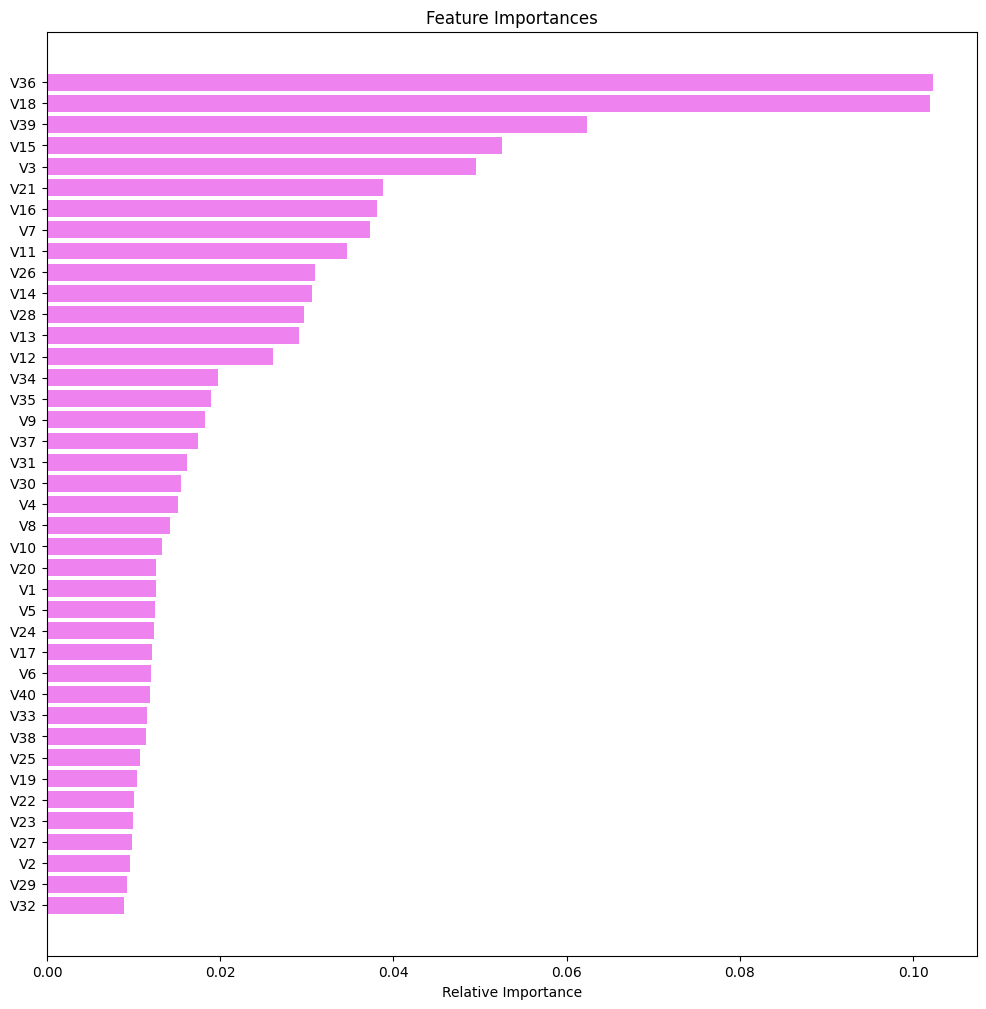

In [59]:
feature_names = X.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations**
*  While we may know know what each parameters mean we can use the list above to pripritize the parameters and their inspections
*Fluctuations in V36, V18, V39, V15, V3 should be given immediate attention

## Pipelines to build the final model


- Since we have only one datatype in the data, we don't need to use column transformer here

In [48]:
# Separating target variable and other variables
X_train_pipeline = data.drop(columns="Target")
y_train_pipeline = data["Target"]

In [46]:
# Since we already have a separate test set, we don't need to divide data into train and test

X_test_pipeline = data_test.drop(columns="Target")
y_test_pipeline = data_test['Target']


In [37]:
Pipeline_model = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
        (
        "rf",
        RandomForestClassifier(
        max_features='sqrt',
        random_state=1,
        max_samples= np.float64(0.5),
        n_estimators = 300,
        min_samples_leaf= np.int64(2)
        ),
        ),
    ]
)

In [38]:
# We can't oversample/undersample data without doing missing value treatment, so let's first treat the missing values in the train set
imputer = SimpleImputer(strategy="median")
X_train_pipeline = imputer.fit_transform(X_train_pipeline)


As the best model is built on the undersampled data,we need to perform undersampling

In [39]:
# # Under Sampling Technique
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train_pipeline, y_train_pipeline)

In [40]:
Pipeline_model.fit(X_train_un, y_train_un)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('rf',
                 RandomForestClassifier(max_samples=np.float64(0.5),
                                        min_samples_leaf=np.int64(2),
                                        n_estimators=300, random_state=1))])

In [50]:
Pipeline_model_test = model_performance_classification_sklearn(Pipeline_model, X_test_pipeline, y_test_pipeline)
print("Test performance:")
Pipeline_model_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.945,0.872,0.507,0.641


*  Model is performing as expected in the test data

# **Business Insights and Conclusions**

## **Conclusions**

* **Random Forest Classifier with Random Search Tuning on the undersampled** dataset performed the best for Recall and had almost balanced results across the board without much overfitting

* Random Forest Classifier with Random Search Tuning  on the undersampled dataset was chosen for pipeline production

* While it does the best job of minimizing the replcement cost through regular maintenace,it requires more number of inspection due to the low precision score

* Fluctuations in V36, V18, V39, V15, V3 should be given immediate attention

## **Recommendations**

* **Employee Training and Awareness**: Conduct training sessions for the relevant employees to make them aware of the model insights such as giving immediate attention to fluctuations in the features V36, V18, V39, V15, V3

* **Data Quality**:Ensure the quality and completeness of data used for model input.Always use updated data to improve the accuracy of the model

* **Continuos Model Monitoring**: Track the performance of the model over time.Implement alerts or notification in cases which affects the model accuracy

* **Always have Backup plan**: Develop contingency  plans in case of potential equipment failure even model predicts low risk.

* **Develop a Feedback Mechanism**:Develop a feedback mechanism through which the employees can give input about the model recommendations in the real world scenario

***